In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv2D, MaxPooling2D, Flatten, TimeDistributed, Bidirectional, GRU
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = pd.read_csv("/kaggle/input/meta-stock-price-data/META.csv")
df.head()

Date       Open       High        Low      Close     Volume
0  2012-05-18  41.889986  44.828761  37.855398  38.084522  573576400
1  2012-05-21  36.390988  36.520494  32.874422  33.900501  168192700
2  2012-05-22  32.485908  33.462179  30.822263  30.882034  101786600
3  2012-05-23  31.250625  32.376325  31.240663  31.878227   73600000
4  2012-05-24  32.824611  33.083620  31.649101  32.904305   50237200

In [2]:
df.describe()

Open         High          Low        Close        Volume
count  3207.000000  3207.000000  3207.000000  3207.000000  3.207000e+03
mean    189.636449   192.084653   187.253644   189.736425  2.920640e+07
std     137.695542   139.427856   135.989940   137.796377  2.569291e+07
min      18.011199    18.200477    17.483216    17.662531  4.726100e+06
25%      89.134517    89.886639    87.799616    89.264019  1.541665e+07
50%     166.205096   168.147677   163.575156   166.055679  2.162990e+07
75%     254.567571   258.412882   249.168191   253.750687  3.332275e+07
max     736.000000   740.909973   725.619995   736.669983  5.735764e+08

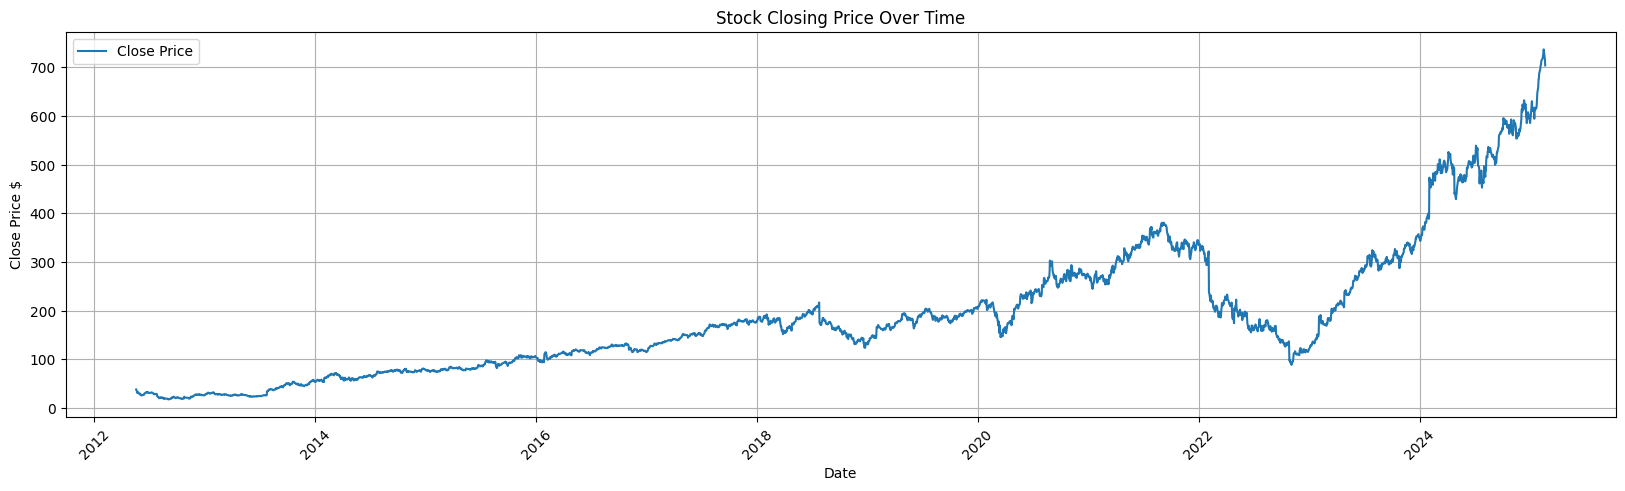

In [3]:
# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])
# Plot the stock prices
plt.figure(figsize=(20, 5))
plt.plot(df["Date"], df["Close"],label="Close Price")
# Customize the plot
plt.xlabel("Date")
plt.ylabel("Close Price $")
plt.title("Stock Closing Price Over Time")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

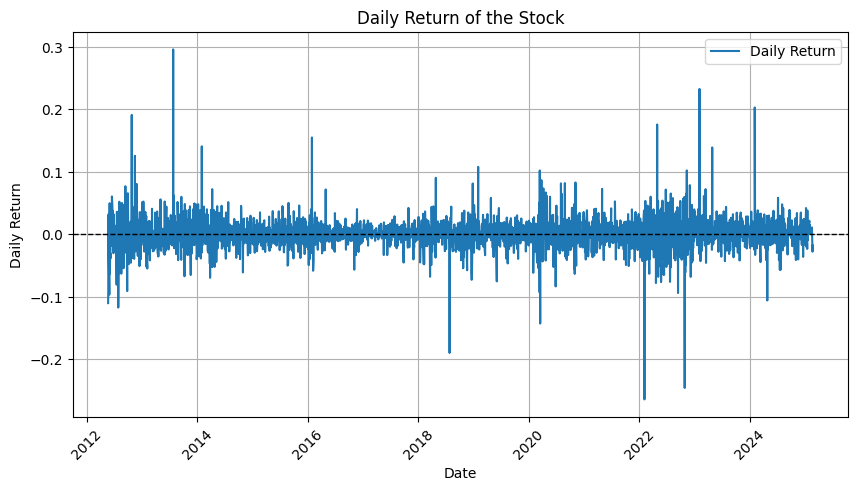

In [4]:
# Compute daily return
df["Daily Return"] = df["Close"].pct_change()
# Plot daily return
plt.figure(figsize=(10, 5))
plt.plot(df["Date"], df["Daily Return"], label="Daily Return")
# Customize the plot
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.title("Daily Return of the Stock")
plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


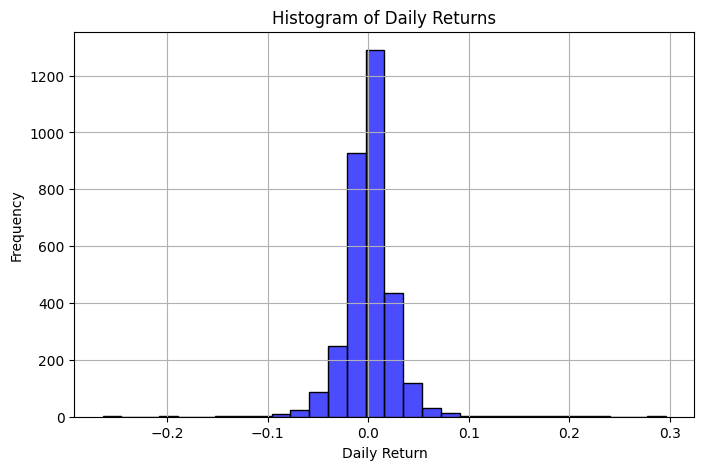

In [5]:
# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["Daily Return"].dropna(), bins=30, alpha=0.7, color='blue', edgecolor='black')
# Customize the plot
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.title("Histogram of Daily Returns")
plt.grid(True)
plt.show()

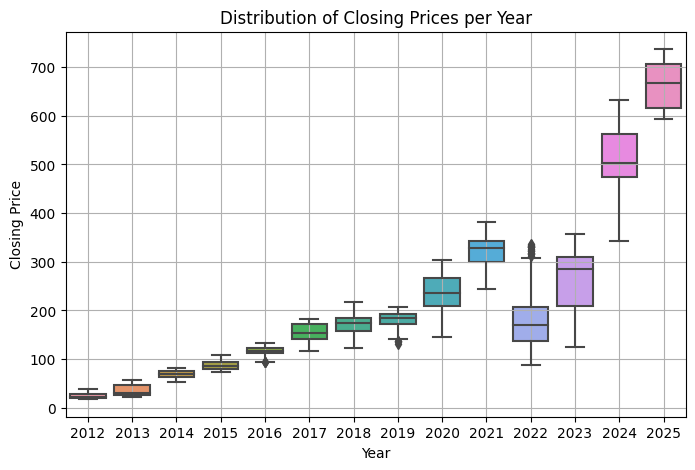

In [6]:
# Convert Date column to datetime and extract the year
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
# Plot the boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Year"], y=df["Close"])
# Customize the plot
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("Distribution of Closing Prices per Year")
plt.grid(True)
plt.show()

**PREDICTING THE CLOSING PRICE USING LSTM**

Processing ticker: META
Training with learning rate: 1e-05


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1013 - val_loss: 0.0925
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0900 - val_loss: 0.0763
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0685 - val_loss: 0.0607
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0582 - val_loss: 0.0451
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0432 - val_loss: 0.0308
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0308 - val_loss: 0.0181
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0170 - val_loss: 0.0091
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0104 - val_loss: 0.0039
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0063 - val_loss: 0.0023
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0055 - val_loss: 0.0018
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0052 - val_loss: 0.0016
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0

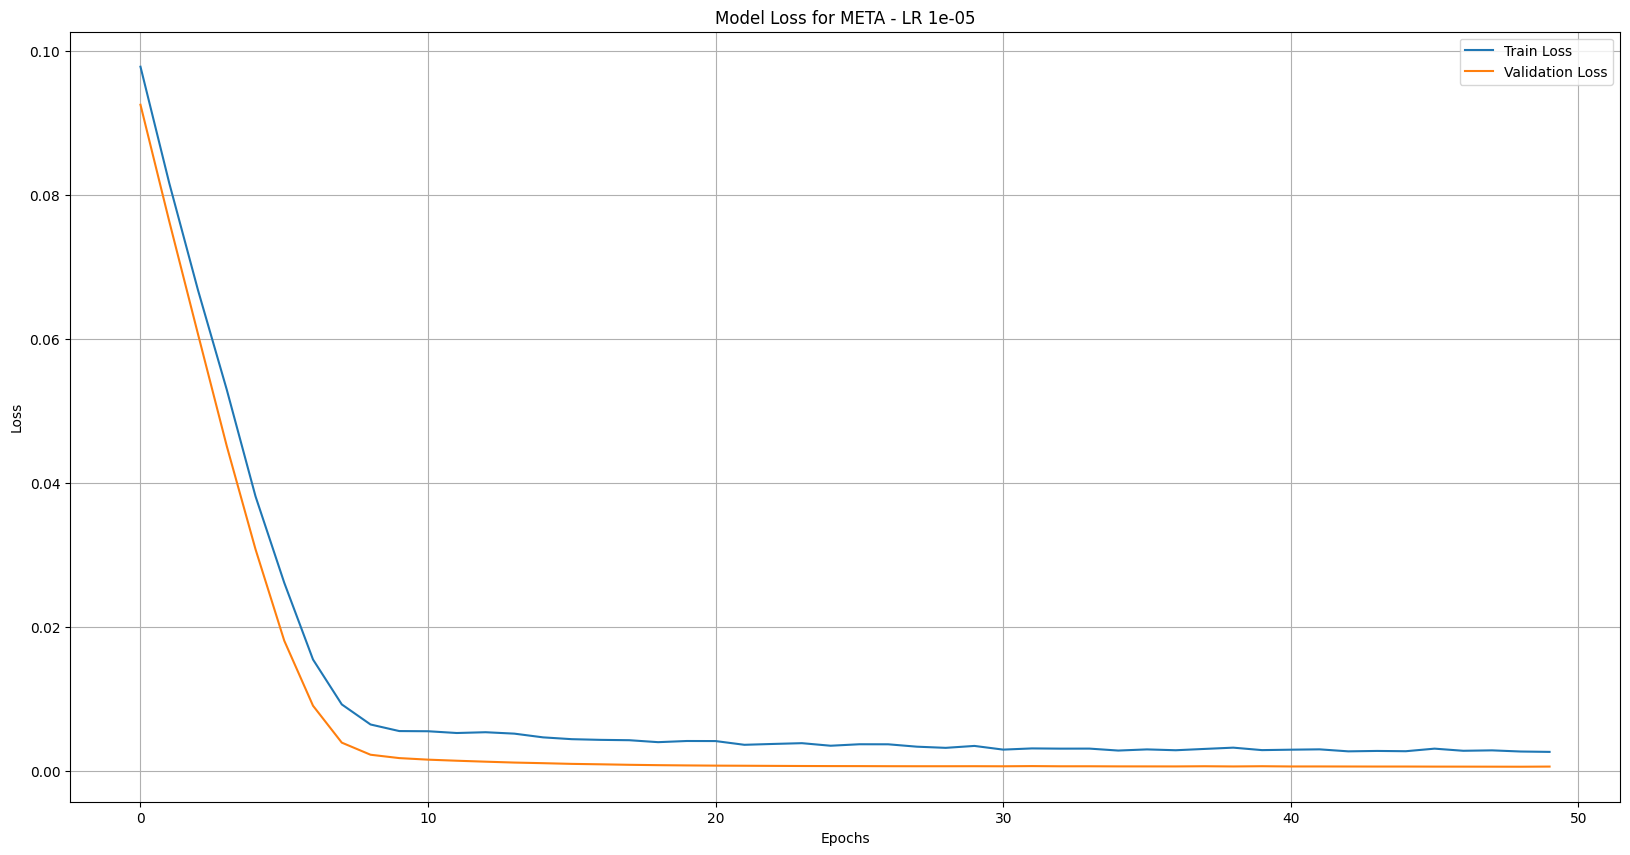

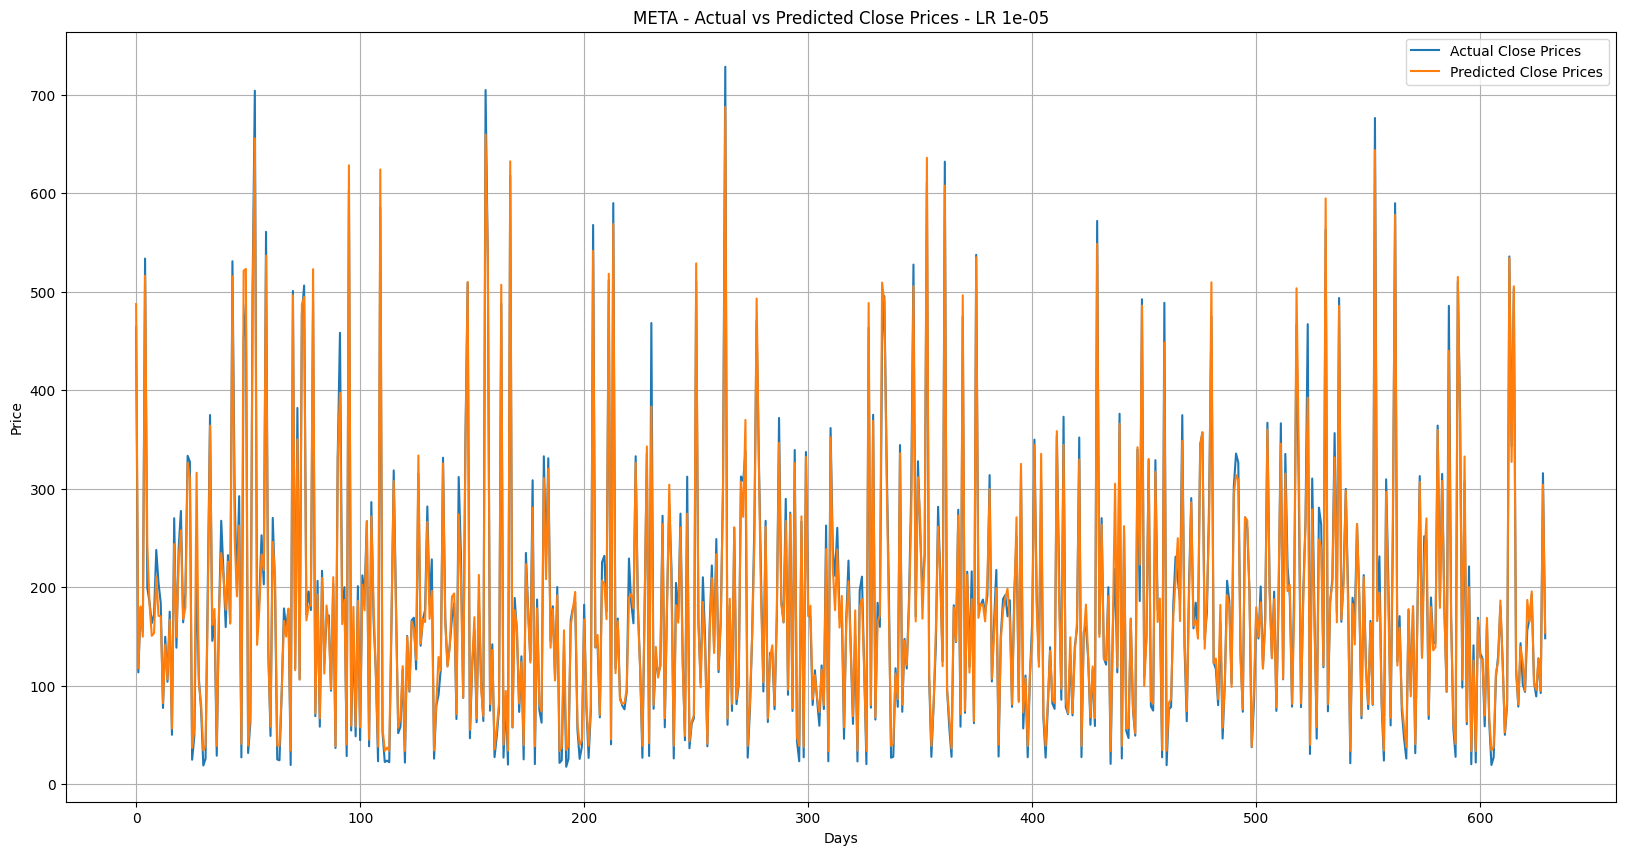

Training with learning rate: 0.0001
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0659 - val_loss: 0.0057
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0062 - val_loss: 0.0019
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0035 - val_loss: 7.5931e-04
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0028 - val_loss: 4.9849e-04
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0028 - val_loss: 4.6965e-04
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0021 - val_loss: 5.3736e-04
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0024 - val_loss: 5.2649e-04
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0024 - val_loss: 5.6636e-04
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0024 - val_loss: 4.6645e-04
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0021 - val_loss: 4.2706e-04
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0021 - val_loss: 4.2389e-04
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━

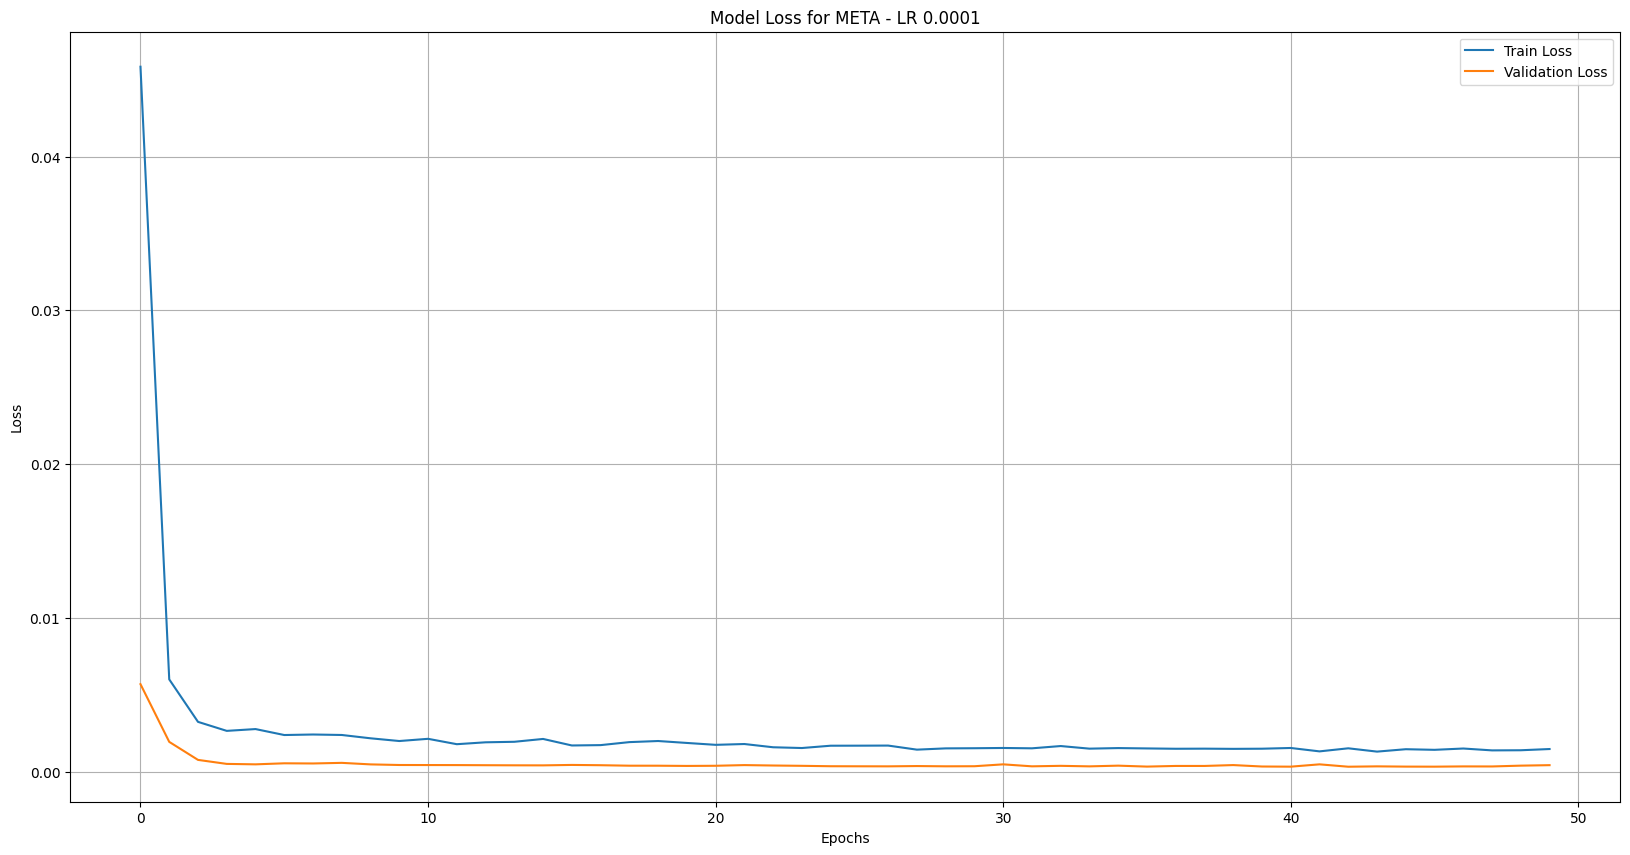

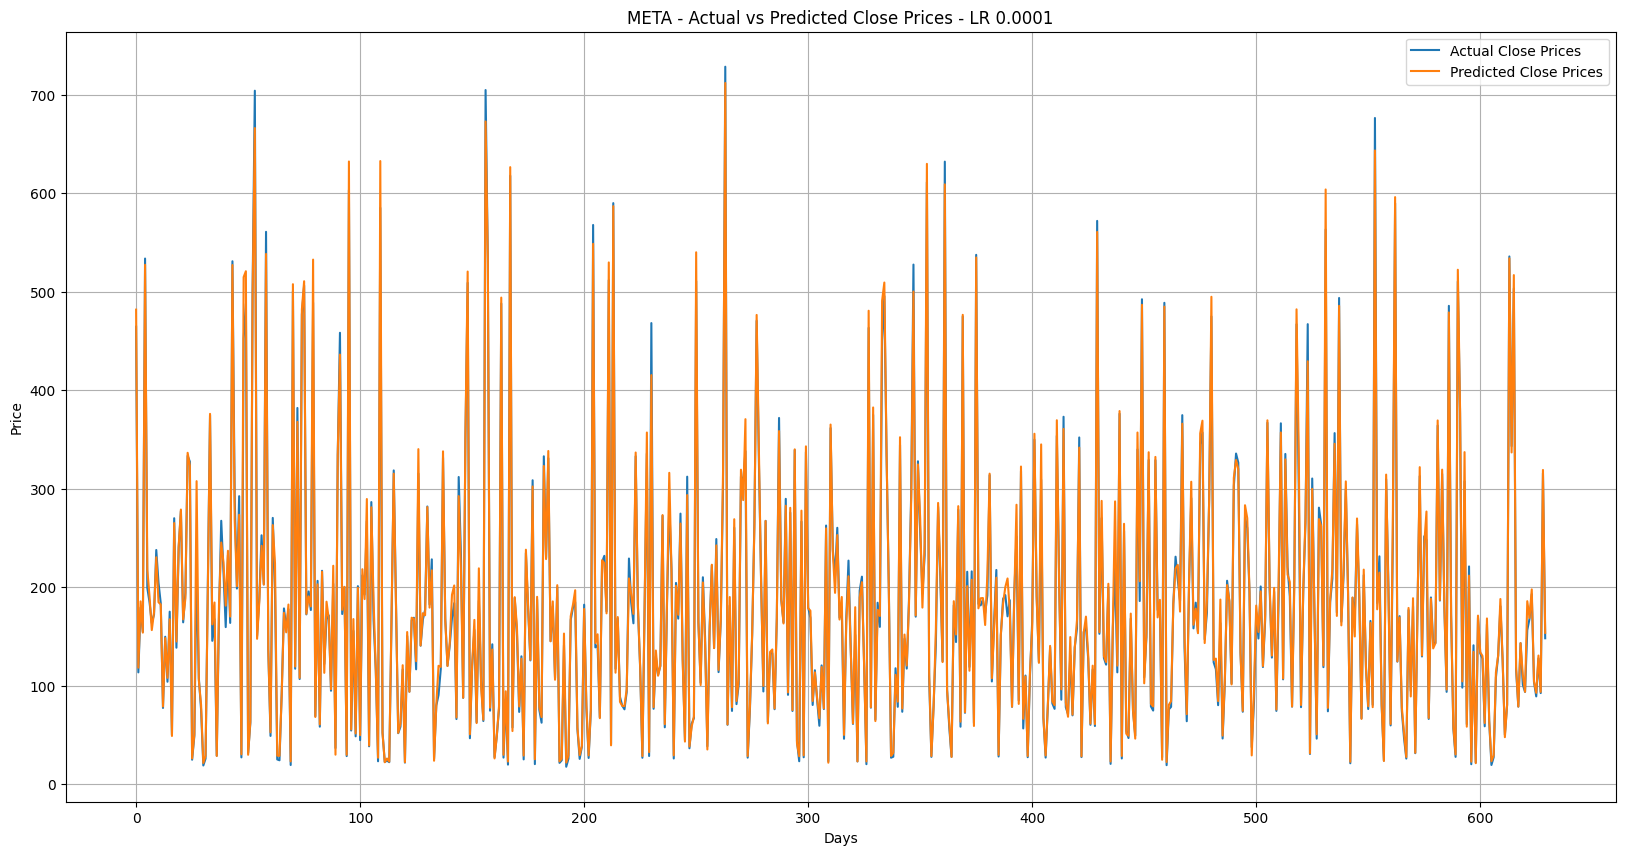

Training with learning rate: 0.001
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0232 - val_loss: 0.0010
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0023 - val_loss: 4.1064e-04
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0017 - val_loss: 2.2848e-04
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0016 - val_loss: 2.6243e-04
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0017 - val_loss: 2.4777e-04
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0015 - val_loss: 3.2017e-04
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0014 - val_loss: 3.7355e-04
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0015 - val_loss: 3.9090e-04
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0017 - val_loss: 2.5014e-04
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0012 - val_loss: 3.2899e-04
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0015 - val_loss: 5.6097e-04
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━

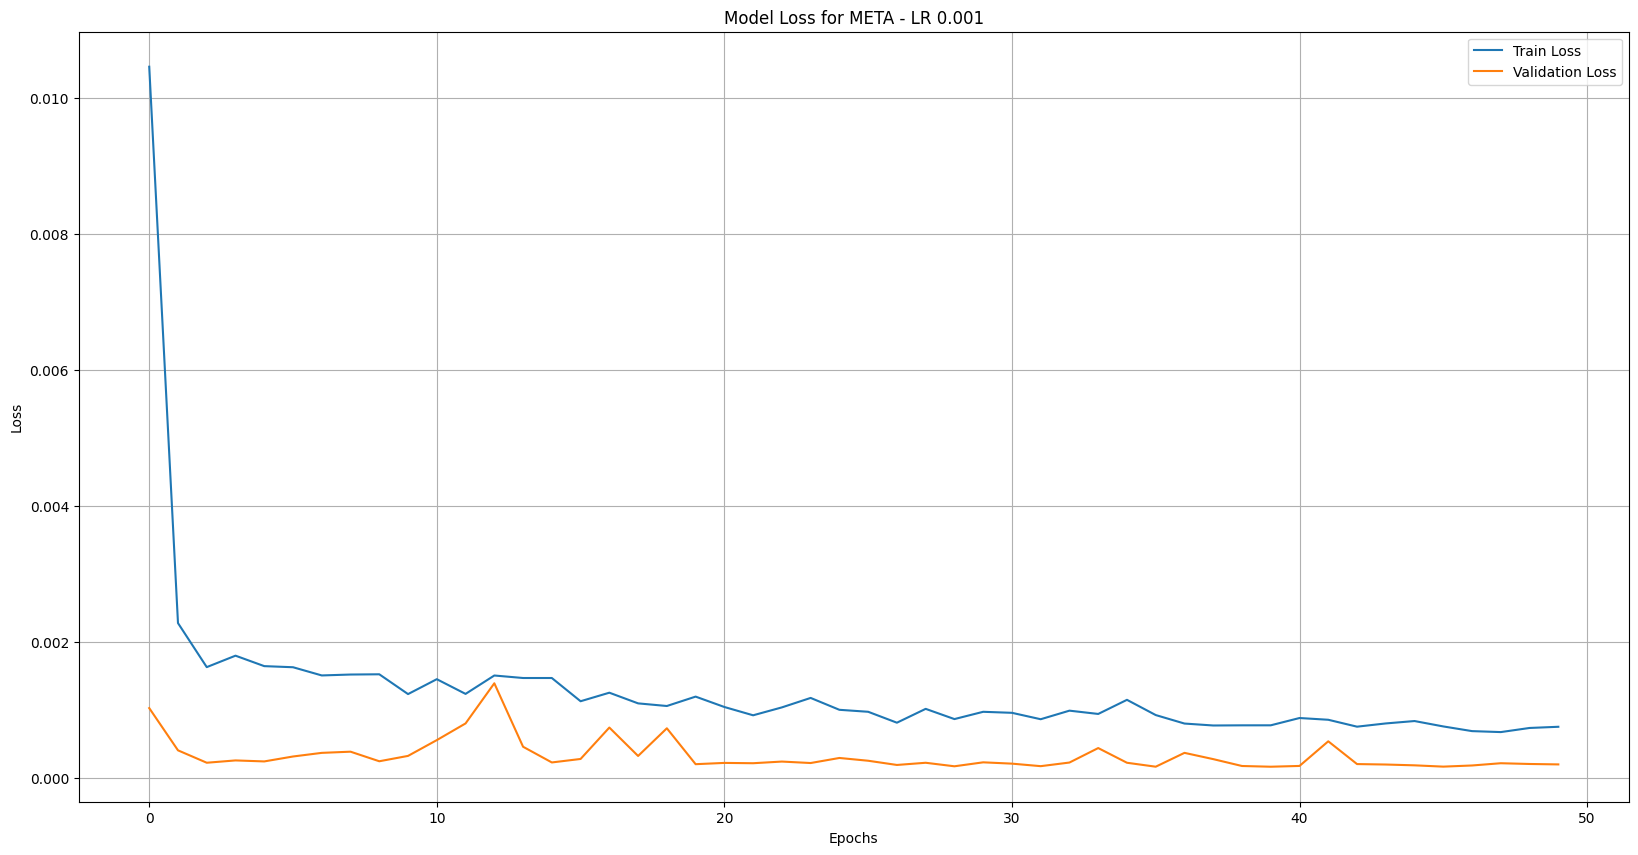

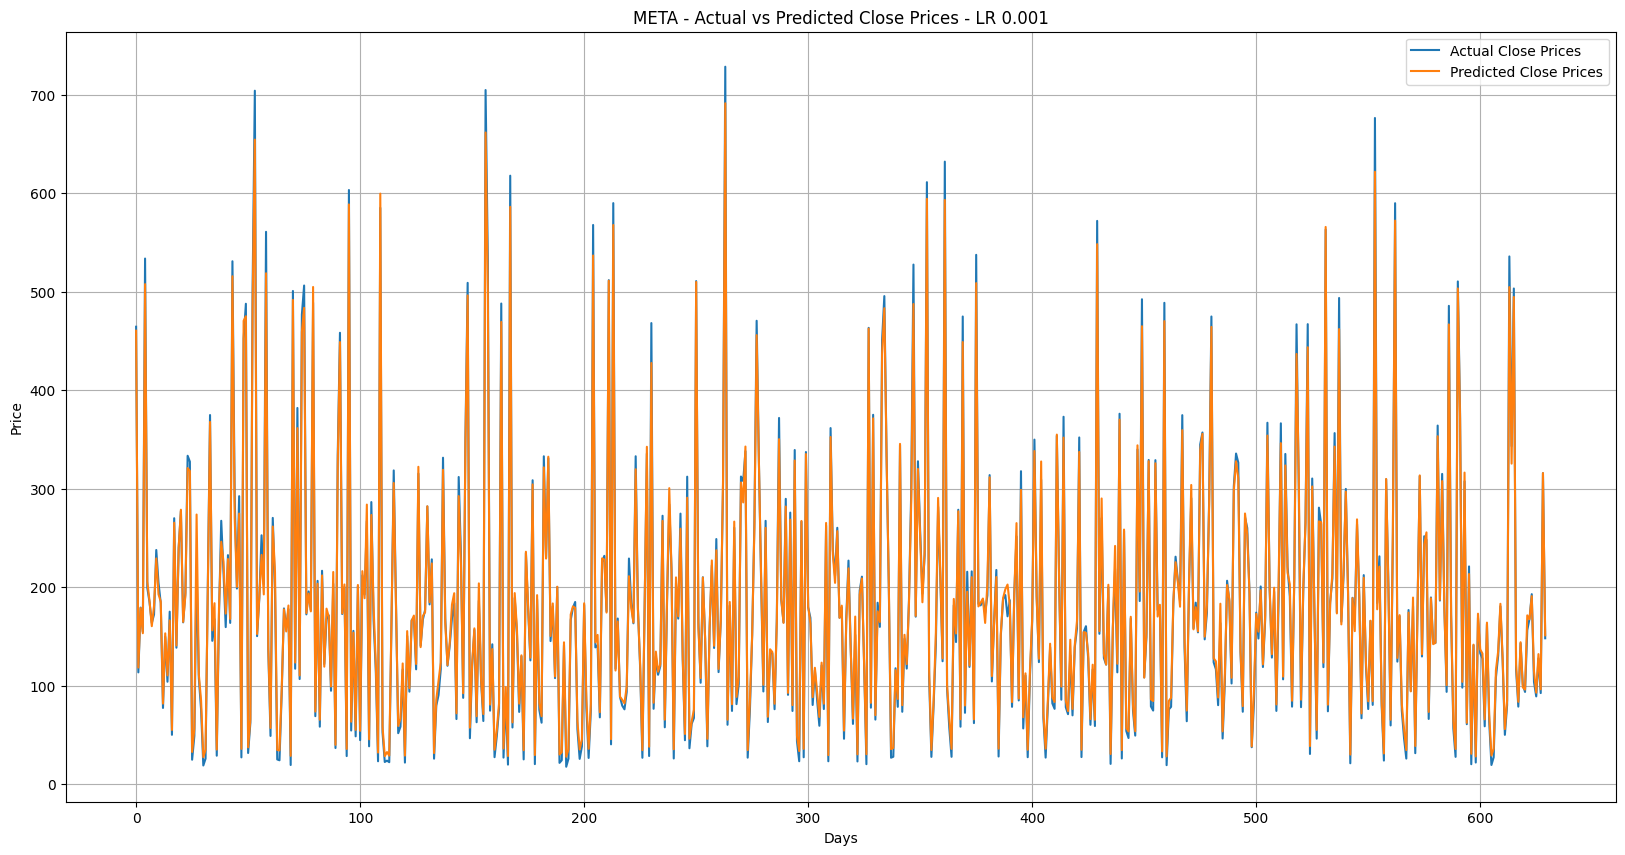

Training with learning rate: 0.01
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0938 - val_loss: 5.5185e-04
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0036 - val_loss: 3.3876e-04
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0026 - val_loss: 3.6586e-04
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0019 - val_loss: 2.5962e-04
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0017 - val_loss: 2.4440e-04
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0017 - val_loss: 2.8033e-04
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0015 - val_loss: 3.9039e-04
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0015 - val_loss: 5.1288e-04
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0016 - val_loss: 7.0940e-04
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0014 - val_loss: 5.3761e-04
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0017 - val_loss: 3.4278e-04
Epoch 12/50
32/32 ━━━━━━━━━━━━

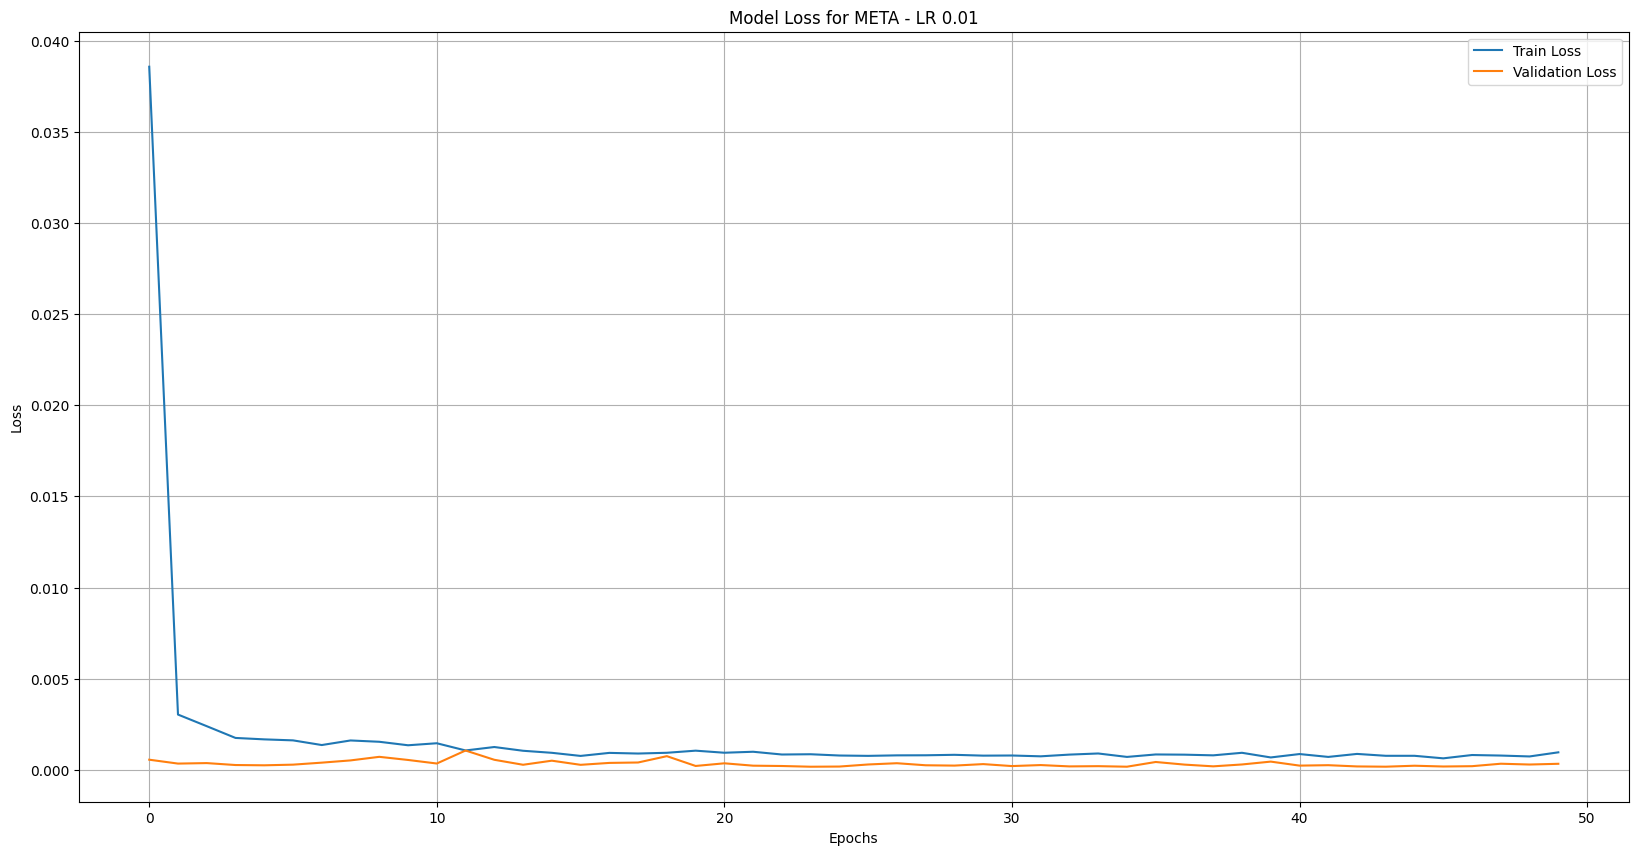

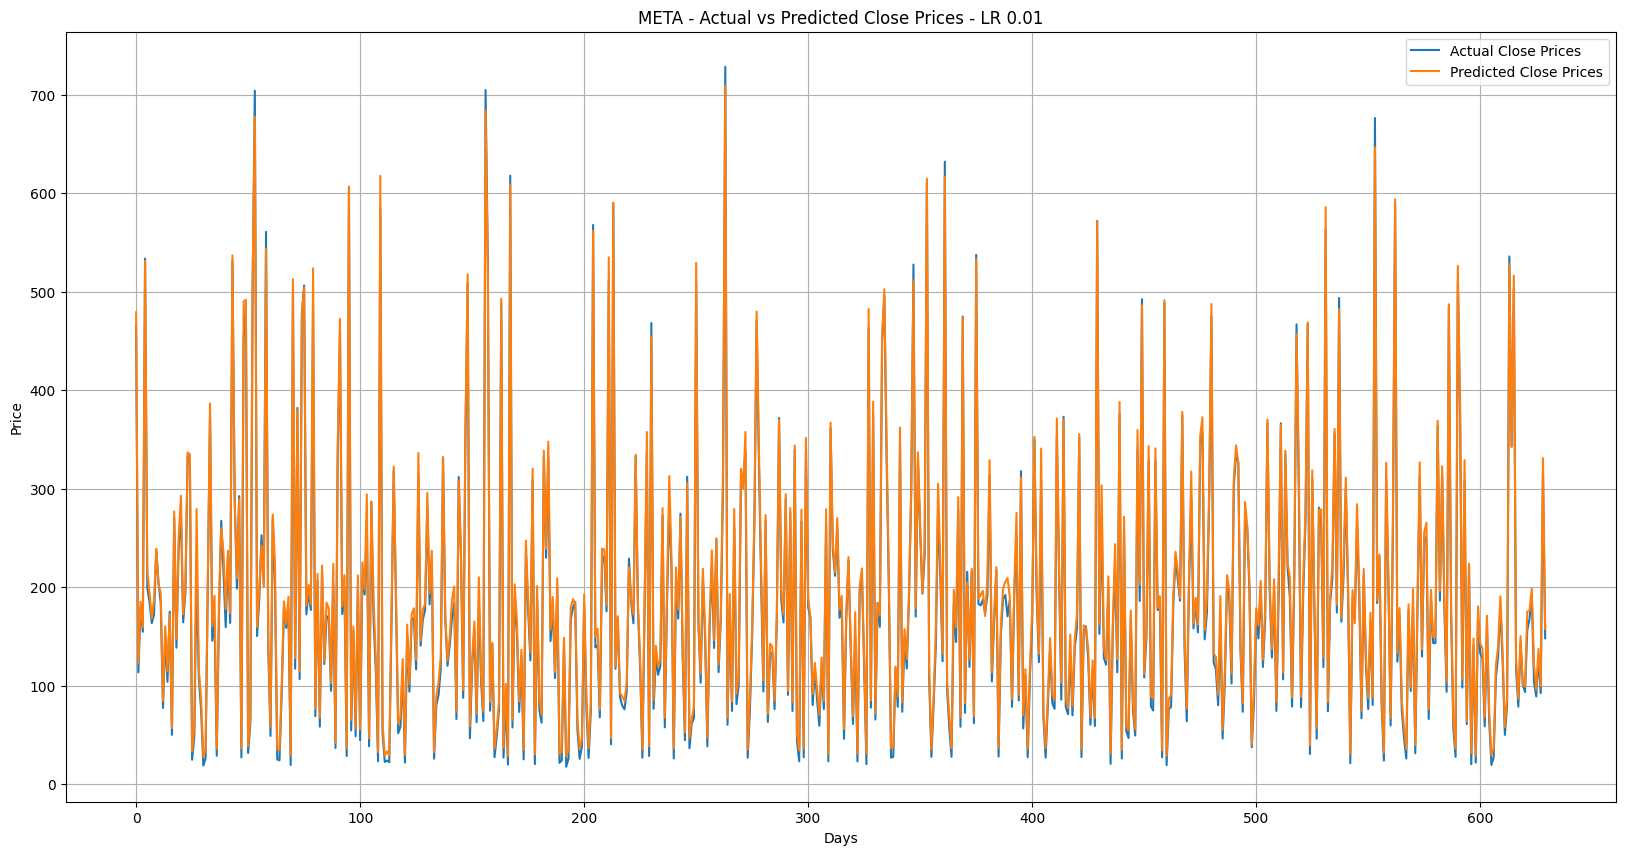

0.00001     0.00010     0.00100     0.01000
0  487.491272  481.862671  460.463867  479.208801
1  117.867714  118.276360  118.395905  122.649124
2  180.432251  185.596283  178.750458  185.158554
3  149.703033  153.849228  153.225967  159.413437
4  516.352661  527.414978  507.760651  531.274109

In [7]:
def fit_lstm_individual(df, look_back=60, epochs=50, batch_size=64, learning_rates=[0.00001, 0.0001, 0.001, 0.01]):
    """
    Fits an LSTM model to the close prices for META using different learning rates.

    Parameters:
    - df: DataFrame containing close prices.
    - look_back: Number of past time steps to use as input features.
    - epochs: Number of epochs for training.
    - batch_size: Batch size for training.
    - learning_rates: List of learning rates to iterate over.

    Returns:
    - A dictionary with learning rates as keys and their trained models and predictions as values.
    - A DataFrame containing the predictions for META.
    """
    results = {}
    predictions_dict = {}
    scaler = MinMaxScaler(feature_range=(0, 1))

    print("Processing ticker: META")
    ticker_data = df["Close"].values.reshape(-1, 1)
    ticker_scaled = scaler.fit_transform(ticker_data)

    # Create dataset for time series modeling
    def create_dataset(data, look_back):
        X, Y = [], []
        for i in range(look_back, len(data)):
            X.append(data[i - look_back:i, 0])
            Y.append(data[i, 0])
        return np.array(X), np.array(Y)

    X, y = create_dataset(ticker_scaled, look_back)
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Reshape input for LSTM
    X_train = X_train.reshape(X_train.shape[0], look_back, 1)
    X_test = X_test.reshape(X_test.shape[0], look_back, 1)
    for lr in learning_rates:
        print(f"Training with learning rate: {lr}")
        # LSTM model
        model = Sequential()
        model.add(LSTM(100, return_sequences=True, input_shape=(look_back, 1)))
        model.add(Dropout(0.5))
        model.add(LSTM(100, return_sequences=False))
        model.add(Dropout(0.5))
        model.add(Dense(1))
        # Compile the model
        optimizer = Adam(learning_rate=lr)
        model.compile(optimizer=optimizer, loss='mean_squared_error')
        # Train the model
        history = model.fit(
            X_train, y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_split=0.2,
            verbose=1
        )
        # Predictions
        y_pred = model.predict(X_test)
        y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
        y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
        # Save predictions
        predictions_dict[lr] = y_pred_inv.flatten()
        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
        mae = mean_absolute_error(y_test_inv, y_pred_inv)
        r_squared = r2_score(y_test_inv, y_pred_inv)
        final_loss = history.history['loss'][-1]
        print(f"META - Learning Rate: {lr} - RMSE: {rmse}, MAE: {mae}, R-squared: {r_squared}, Loss: {final_loss}")
        # Save results
        results[lr] = {
            'model': model,
            'predictions': y_pred_inv,
            'actuals': y_test_inv,
            'metrics': {
                'RMSE': rmse,
                'MAE': mae,
                'R-squared': r_squared,
                'Loss': final_loss
            },
            'history': history.history
        }
        # Plot training & validation loss
        plt.figure(figsize=(20, 10))
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Model Loss for META - LR {lr}')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.show()
        # Plot the results
        plt.figure(figsize=(20, 10))
        plt.plot(y_test_inv, label='Actual Close Prices')
        plt.plot(y_pred_inv, label='Predicted Close Prices')
        plt.title(f'META - Actual vs Predicted Close Prices - LR {lr}')
        plt.xlabel('Days')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.show()
    # Convert predictions dictionary to DataFrame
    prediction = pd.DataFrame(predictions_dict)
    return results, prediction
results, prediction = fit_lstm_individual(df)
prediction.head()

**LSTM MODEL EVALUATION**

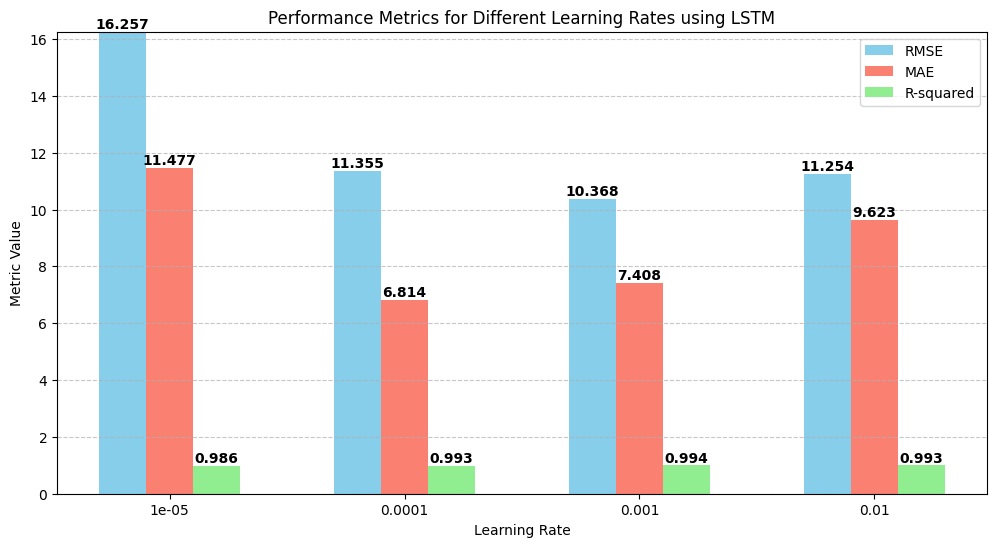

In [8]:
# Extract metrics from the results dictionary
learning_rates_list = list(results.keys())
rmses = [results[lr]['metrics']['RMSE'] for lr in learning_rates_list]
maes = [results[lr]['metrics']['MAE'] for lr in learning_rates_list]
r2s = [results[lr]['metrics']['R-squared'] for lr in learning_rates_list]
# Set width for grouped bars
bar_width = 0.2
x = np.arange(len(learning_rates_list))
plt.figure(figsize=(12, 6))
# Plot bars for RMSE, MAE, and R-squared
plt.bar(x - bar_width, rmses, width=bar_width, color='skyblue', label='RMSE')
plt.bar(x, maes, width=bar_width, color='salmon', label='MAE')
plt.bar(x + bar_width, r2s, width=bar_width, color='lightgreen', label='R-squared')

# Add labels
plt.xlabel('Learning Rate')
plt.ylabel('Metric Value')
plt.title('Performance Metrics for Different Learning Rates using LSTM')
plt.xticks(x, learning_rates_list)  # Set x-axis labels to learning rates
plt.ylim(0, max(max(rmses), max(maes), 1.05))  # Adjust y-axis range
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add value labels
def add_value_labels(ax, values, x_positions, offset):
    for i, val in enumerate(values):
        ax.text(x_positions[i], val + offset, f'{val:.3f}', ha='center', va='bottom', fontweight='bold')
ax = plt.gca()
add_value_labels(ax, rmses, x - bar_width, 0.02)
add_value_labels(ax, maes, x, 0.02)
add_value_labels(ax, r2s, x + bar_width, 0.02)
plt.show()

**CNN+GRU-LSTM**

Processing ticker: META
Training with learning rate: 1e-05
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 170ms/step - loss: 0.0877 - val_loss: 0.0783
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0717 - val_loss: 0.0599
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0564 - val_loss: 0.0428
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0362 - val_loss: 0.0283
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0245 - val_loss: 0.0166
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0148 - val_loss: 0.0099
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0109 - val_loss: 0.0065
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0088 - val_loss: 0.0050
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0067 - val_loss: 0.0040
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0055 - val_loss: 0.0033
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0052 - val_loss: 0.0025
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0041 - val

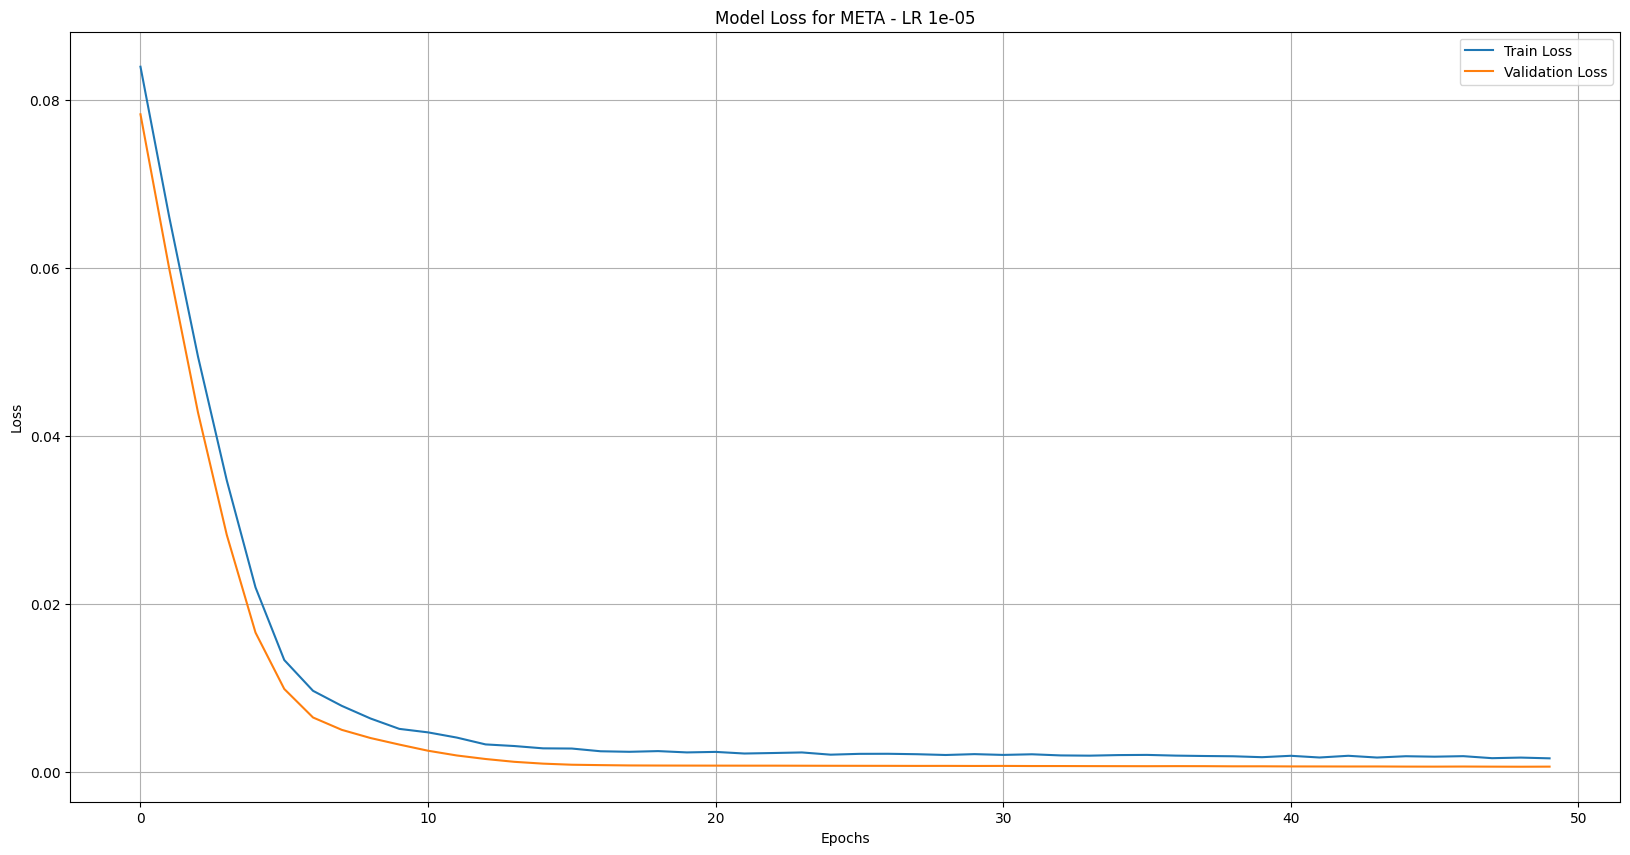

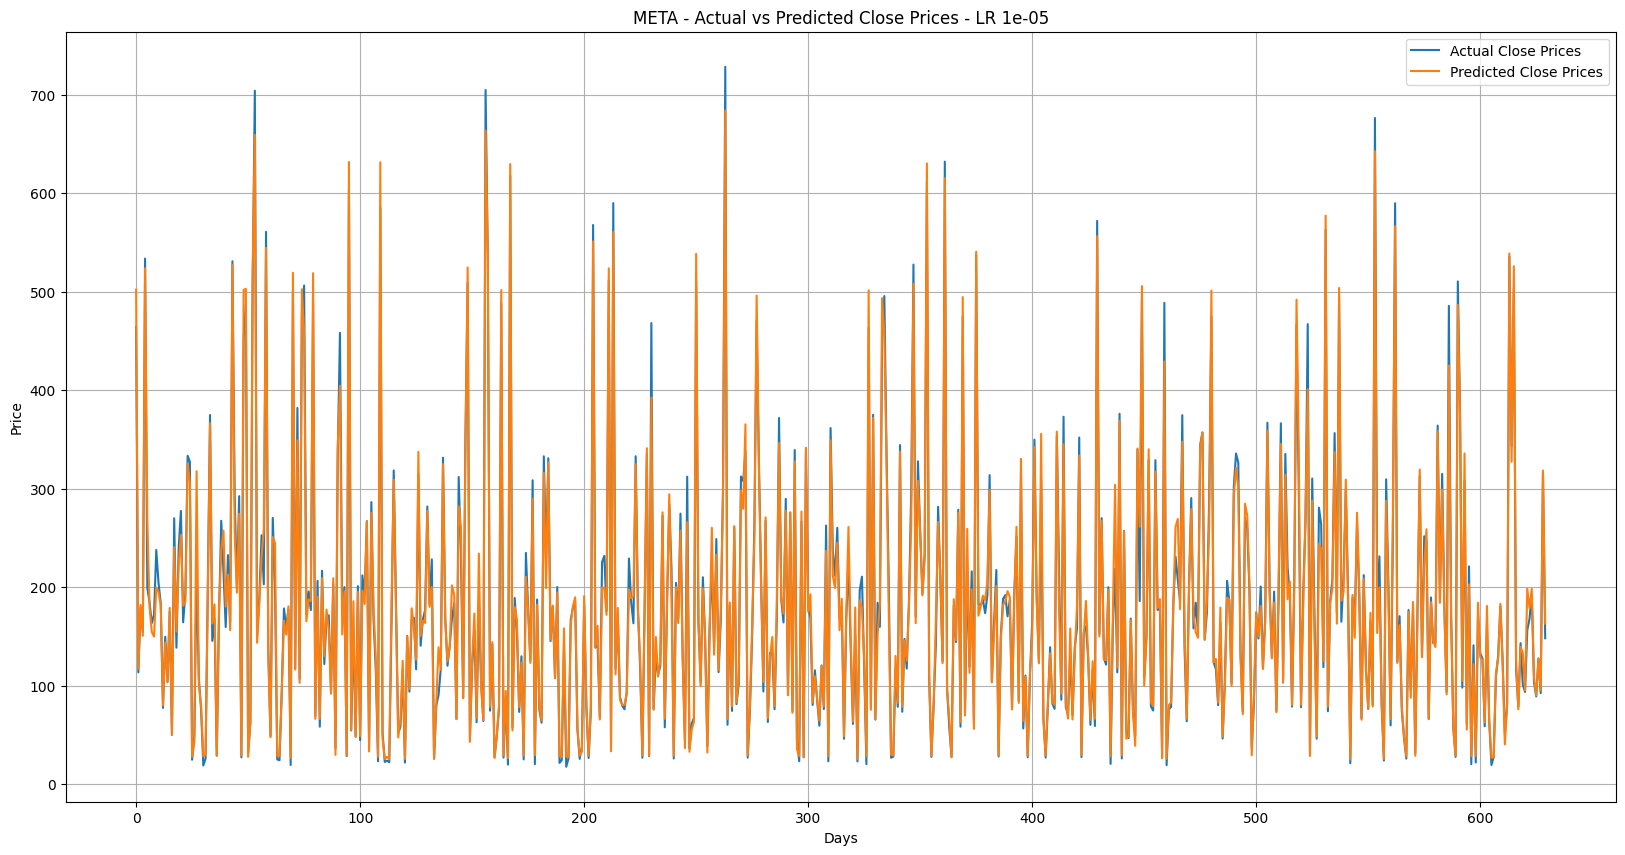

Training with learning rate: 0.0001
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 169ms/step - loss: 0.0734 - val_loss: 0.0093
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0094 - val_loss: 0.0013
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0025 - val_loss: 7.5920e-04
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0019 - val_loss: 7.0157e-04
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0019 - val_loss: 6.5268e-04
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0021 - val_loss: 6.2685e-04
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0019 - val_loss: 5.8215e-04
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0016 - val_loss: 6.2959e-04
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0017 - val_loss: 5.2004e-04
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0016 - val_loss: 5.1385e-04
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0016 - val_loss: 6.0759e-04
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━

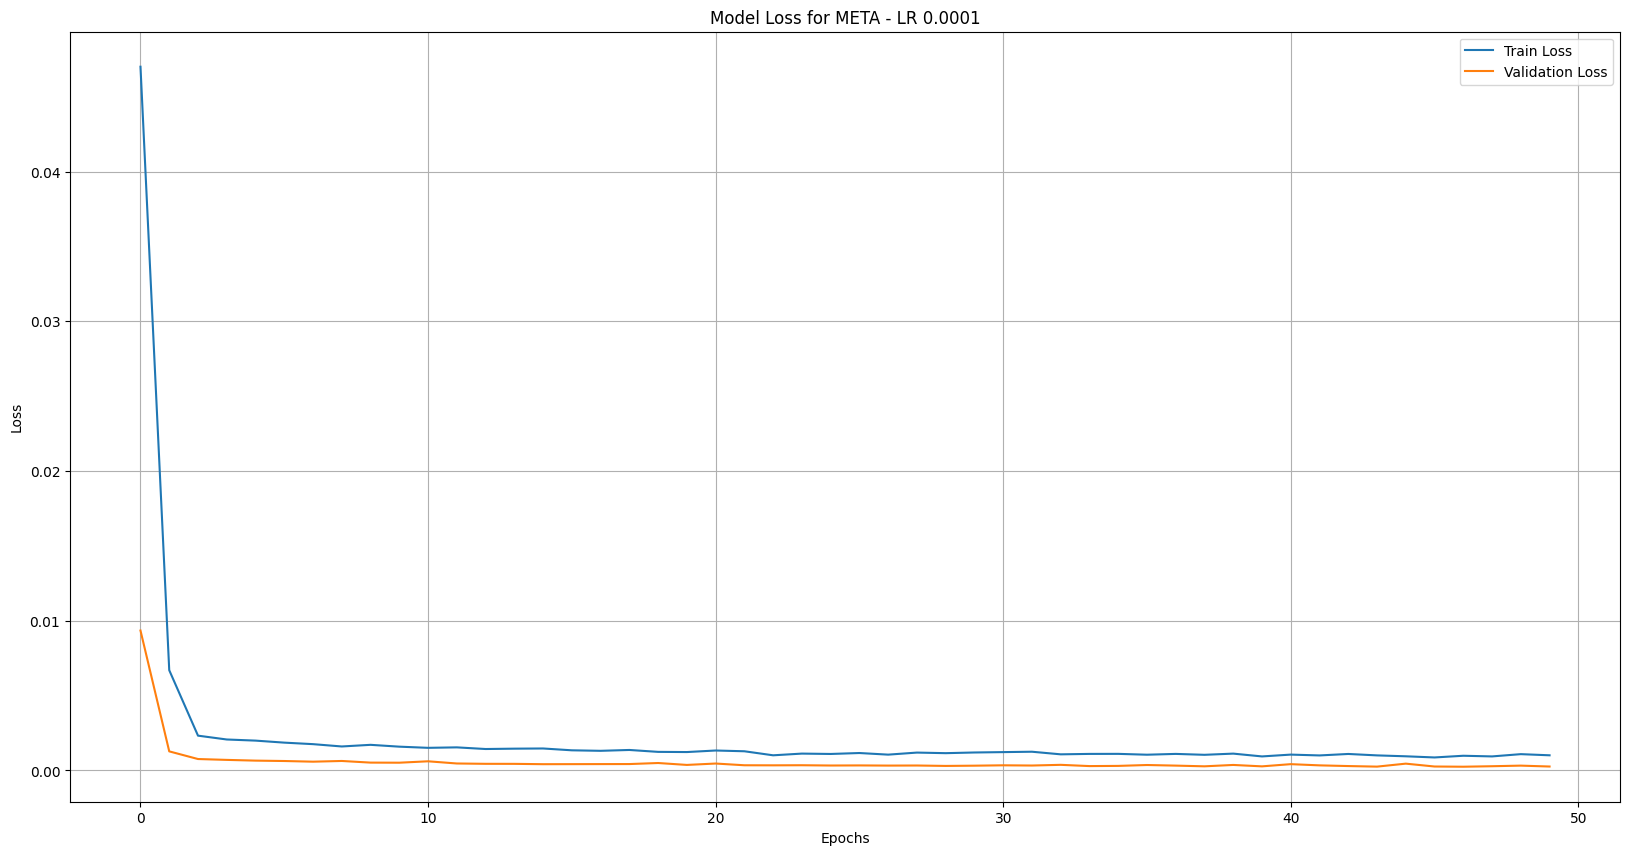

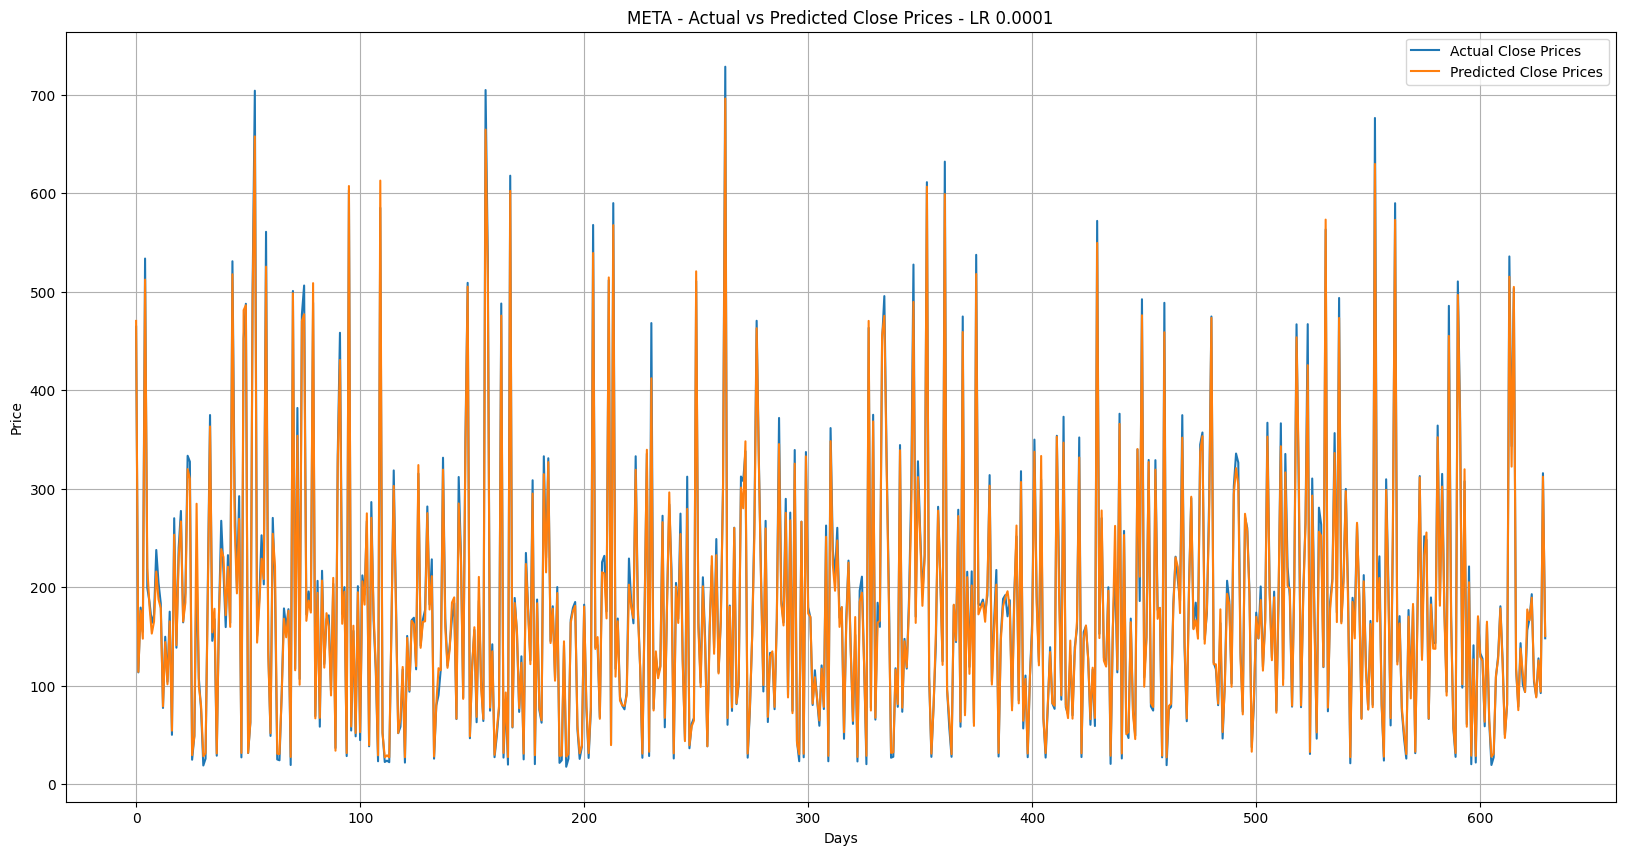

Training with learning rate: 0.001
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 163ms/step - loss: 0.0239 - val_loss: 0.0011
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0020 - val_loss: 6.4664e-04
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0015 - val_loss: 5.5054e-04
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0012 - val_loss: 5.8303e-04
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0017 - val_loss: 5.4160e-04
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0013 - val_loss: 5.8316e-04
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0011 - val_loss: 2.8893e-04
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0011 - val_loss: 2.3975e-04
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0012 - val_loss: 4.0741e-04
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0015 - val_loss: 3.9361e-04
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0014 - val_loss: 5.2830e-04
Epoch 12/50
32/32 ━━━━━━━━━━━━━━

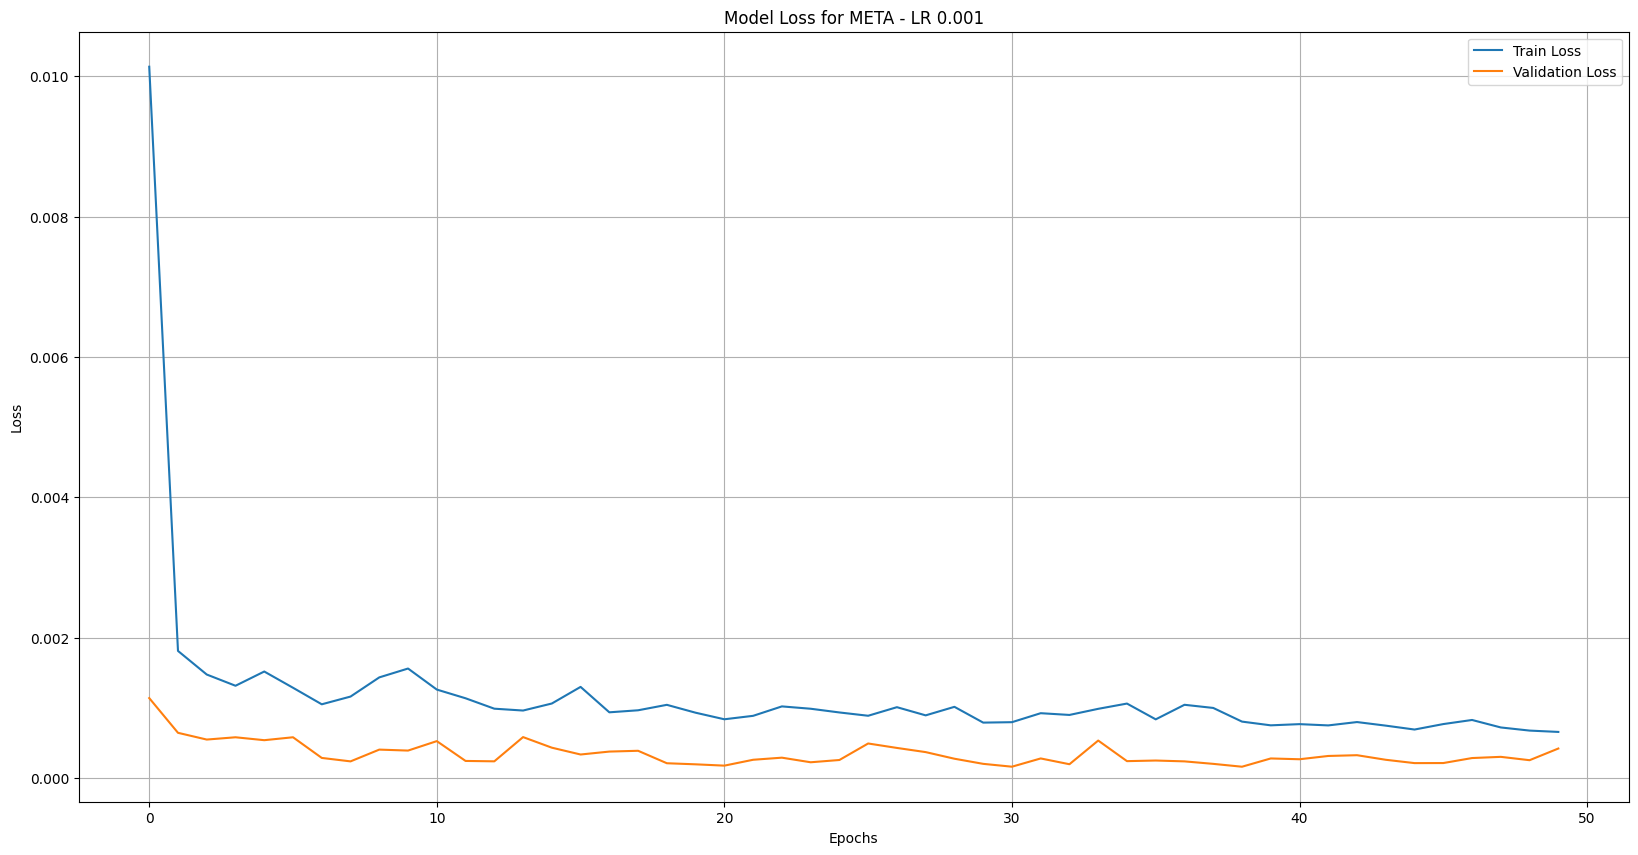

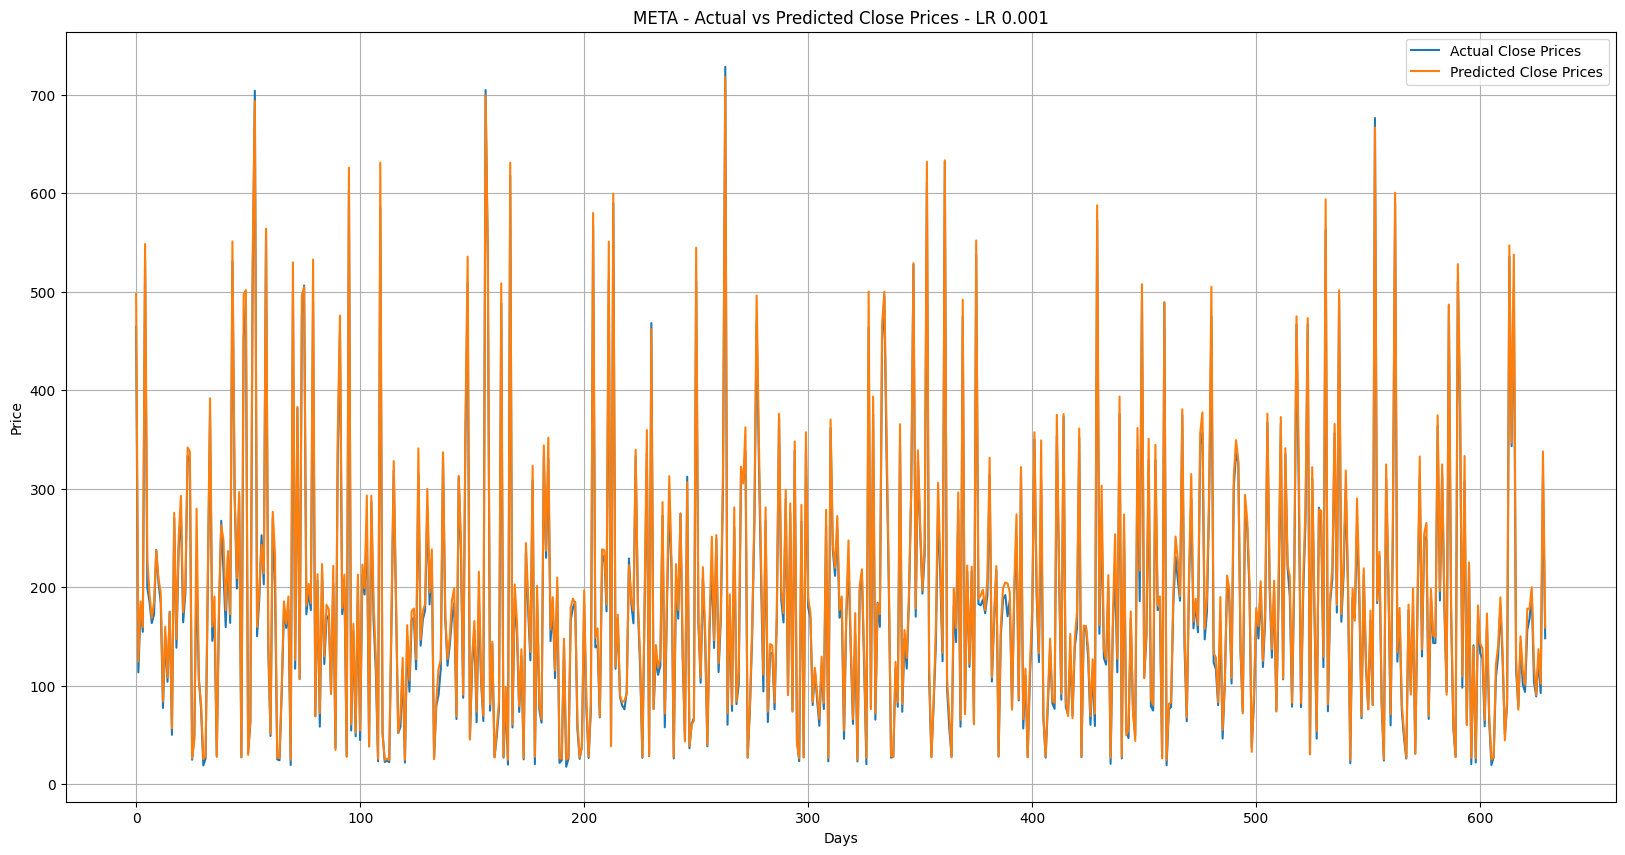

Training with learning rate: 0.01
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 168ms/step - loss: 0.0979 - val_loss: 7.8003e-04
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0025 - val_loss: 3.9175e-04
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0019 - val_loss: 6.1103e-04
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0013 - val_loss: 7.6630e-04
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0014 - val_loss: 7.4967e-04
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0013 - val_loss: 3.3269e-04
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0012 - val_loss: 2.9460e-04
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0013 - val_loss: 3.0481e-04
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0015 - val_loss: 2.9929e-04
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0011 - val_loss: 2.9734e-04
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0014 - val_loss: 4.0112e-04
Epoch 12/50
32/32 ━━━━━━━━━━

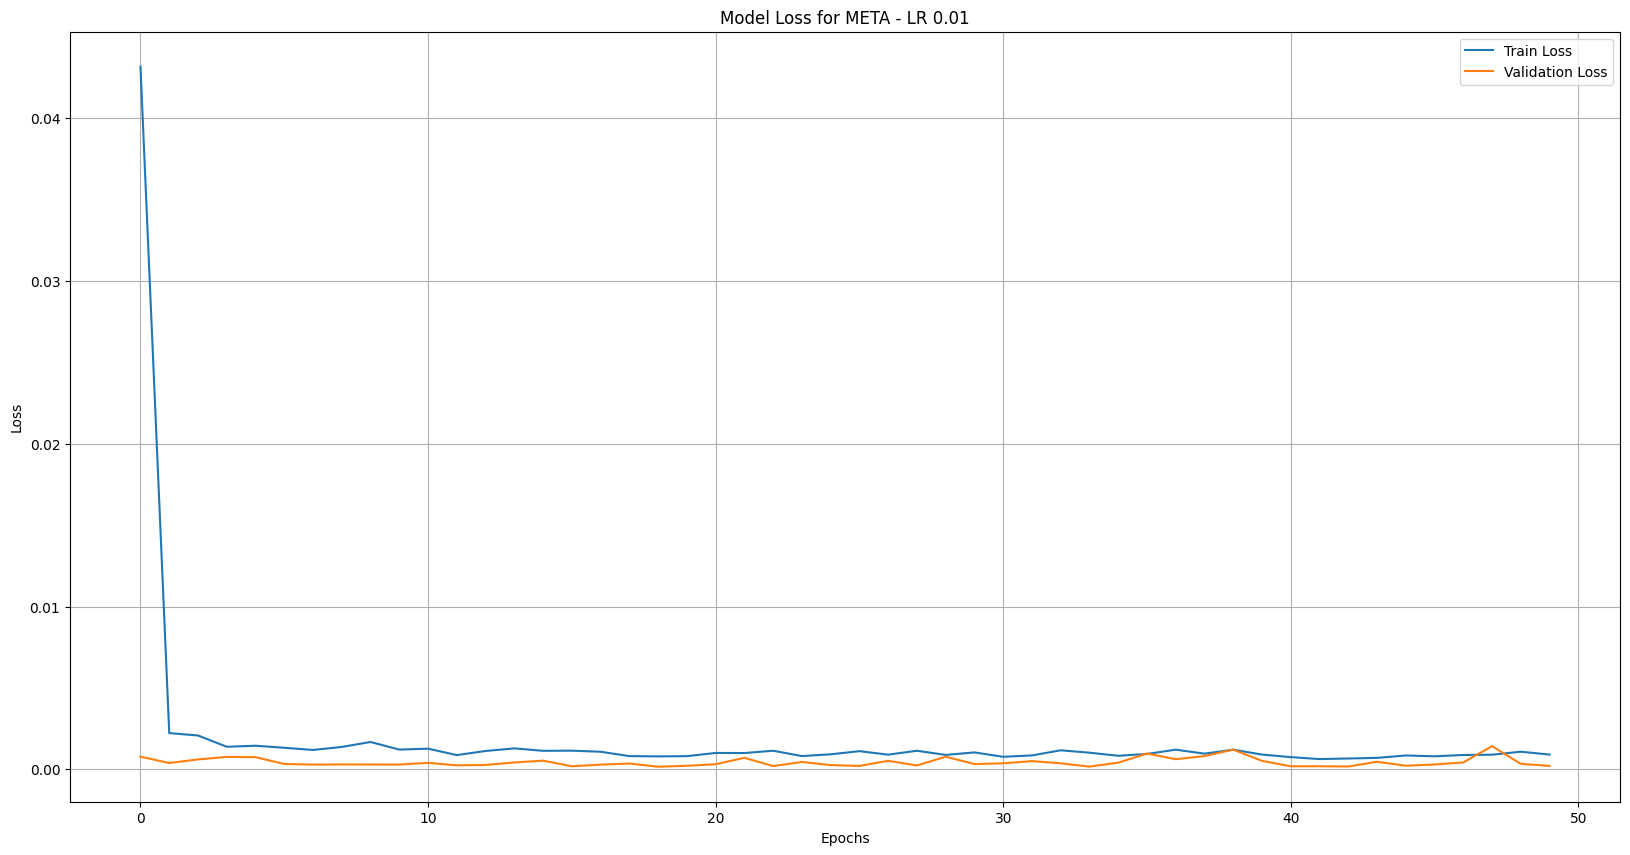

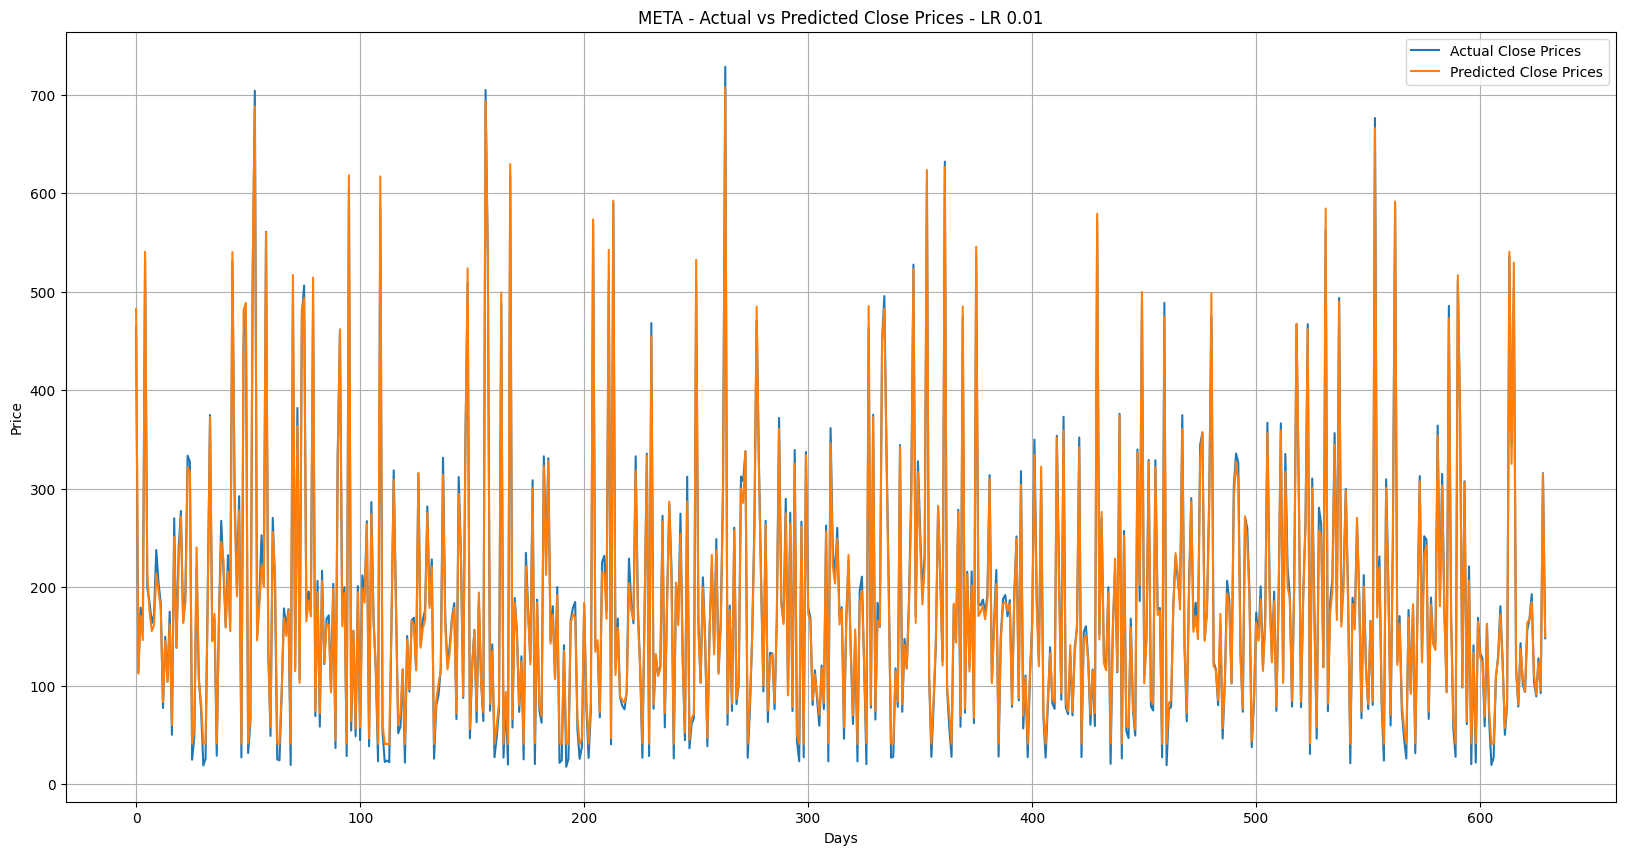

0.00001     0.00010     0.00100     0.01000
0  502.227081  470.396118  497.615112  482.610809
1  117.260788  114.022545  124.342697  112.144638
2  181.929626  176.206161  185.544434  170.891953
3  150.612732  147.693756  159.396683  146.271622
4  523.864990  512.358459  548.501282  540.648132

In [9]:
def fit_cnn_gru_lstm_individual(df, look_back=60, epochs=50, batch_size=64, learning_rates=[0.00001, 0.0001, 0.001, 0.01]):
    """
    Fits an CNN+GRU-LSTM model to the close prices for META using different learning rates.

    Parameters:
    - df: DataFrame containing  close prices.
    - look_back: Number of past time steps to use as input features.
    - epochs: Number of epochs for training.
    - batch_size: Batch size for training.
    - learning_rates: List of learning rates to iterate over.

    Returns:
    - A dictionary with learning rates as keys and their trained models and predictions as values.
    - A DataFrame containing the predictions for META.
    """
    results = {}
    predictions_dict = {}
    scaler = MinMaxScaler(feature_range=(0, 1))
    print("Processing ticker: META")
    ticker_data = df["Close"].values.reshape(-1, 1)
    ticker_scaled = scaler.fit_transform(ticker_data)
    # Create dataset for time series modeling
    def create_dataset(data, look_back):
        X, Y = [], []
        for i in range(look_back, len(data)):
            X.append(data[i - look_back:i, 0])
            Y.append(data[i, 0])
        return np.array(X), np.array(Y)
    X, y = create_dataset(ticker_scaled, look_back)
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Reshape input for CNN+GRU-LSTM
    X_train = X_train.reshape(X_train.shape[0], look_back, 1, 1, 1)
    X_test = X_test.reshape(X_test.shape[0], look_back, 1, 1, 1)
    for lr in learning_rates:
        print(f"Training with learning rate: {lr}")
        # CNN+GRU-LSTM model
        cgl= Sequential()
        cgl.add(TimeDistributed(Conv2D(filters=64, kernel_size=(1, 1), activation='relu'),
                               input_shape=(look_back, 1, 1, 1)))
        cgl.add(TimeDistributed(MaxPooling2D(pool_size=(1, 1))))
        cgl.add(TimeDistributed(Conv2D(filters=128, kernel_size=(1, 1), activation='relu')))
        cgl.add(TimeDistributed(MaxPooling2D(pool_size=(1, 1))))
        cgl.add(TimeDistributed(Conv2D(filters=64, kernel_size=(1, 1), activation='relu')))
        cgl.add(TimeDistributed(MaxPooling2D(pool_size=(1, 1))))
        cgl.add(TimeDistributed(Flatten()))
        cgl.add(Bidirectional(GRU(100, return_sequences=True)))
        cgl.add(Dropout(0.5))
        cgl.add(Bidirectional(LSTM(100, return_sequences=False)))
        cgl.add(Dropout(0.5))
        cgl.add(Dense(1))
        # Compile the model
        optimizer = Adam(learning_rate=lr)
        cgl.compile(optimizer=optimizer, loss='mean_squared_error')
        # Train the model
        history = cgl.fit(
            X_train, y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_split=0.2,
            verbose=1
        )
        # Predictions
        y_pred = cgl.predict(X_test)
        y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
        y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
        # Save predictions
        predictions_dict[lr] = y_pred_inv.flatten()
        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
        mae = mean_absolute_error(y_test_inv, y_pred_inv)
        r_squared = r2_score(y_test_inv, y_pred_inv)
        final_loss = history.history['loss'][-1]
        print(f"META - Learning Rate: {lr} - RMSE: {rmse}, MAE: {mae}, R-squared: {r_squared}, Loss: {final_loss}")
        # Save results
        results[lr] = {
            'model': cgl,
            'predictions': y_pred_inv,
            'actuals': y_test_inv,
            'metrics': {
                'RMSE': rmse,
                'MAE': mae,
                'R-squared': r_squared,
                'Loss': final_loss
            },
            'history': history.history
        }
        # Plot training & validation loss
        plt.figure(figsize=(20, 10))
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Model Loss for META - LR {lr}')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.show()
        # Plot the results
        plt.figure(figsize=(20, 10))
        plt.plot(y_test_inv, label='Actual Close Prices')
        plt.plot(y_pred_inv, label='Predicted Close Prices')
        plt.title(f'META - Actual vs Predicted Close Prices - LR {lr}')
        plt.xlabel('Days')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.show()
    # Convert predictions dictionary to DataFrame
    prediction = pd.DataFrame(predictions_dict)
    return results, prediction
results, prediction = fit_cnn_gru_lstm_individual(df)
prediction.head()

**CNN+GRU-LSTM MODEL EVALUATION**

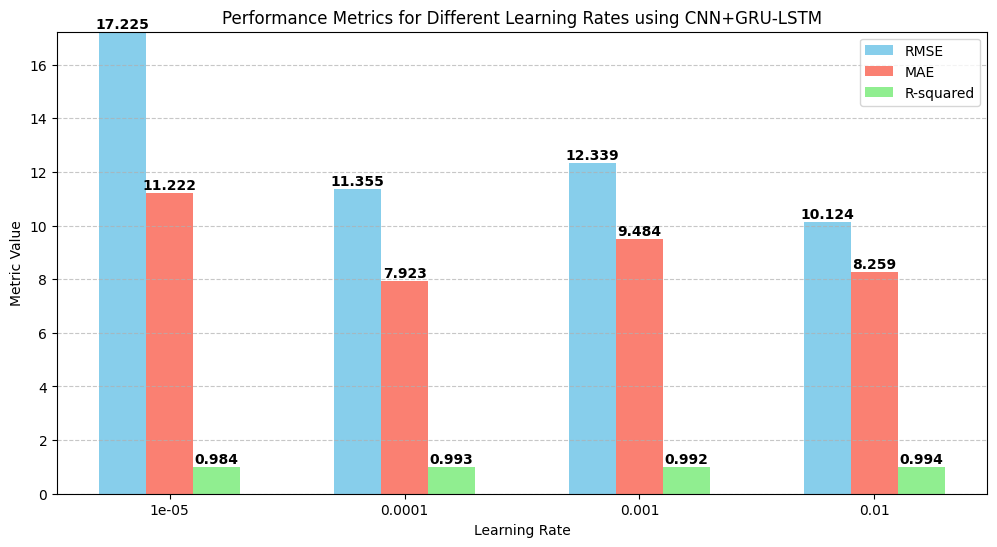

In [10]:
# Extract metrics from the results dictionary
learning_rates_list = list(results.keys())
rmses = [results[lr]['metrics']['RMSE'] for lr in learning_rates_list]
maes = [results[lr]['metrics']['MAE'] for lr in learning_rates_list]
r2s = [results[lr]['metrics']['R-squared'] for lr in learning_rates_list]
# Set width for grouped bars
bar_width = 0.2
x = np.arange(len(learning_rates_list))
plt.figure(figsize=(12, 6))
# Plot bars for RMSE, MAE, and R-squared
plt.bar(x - bar_width, rmses, width=bar_width, color='skyblue', label='RMSE')
plt.bar(x, maes, width=bar_width, color='salmon', label='MAE')
plt.bar(x + bar_width, r2s, width=bar_width, color='lightgreen', label='R-squared')

# Add labels
plt.xlabel('Learning Rate')
plt.ylabel('Metric Value')
plt.title('Performance Metrics for Different Learning Rates using CNN+GRU-LSTM')
plt.xticks(x, learning_rates_list)  # Set x-axis labels to learning rates
plt.ylim(0, max(max(rmses), max(maes), 1.05))  # Adjust y-axis range
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add value labels
def add_value_labels(ax, values, x_positions, offset):
    for i, val in enumerate(values):
        ax.text(x_positions[i], val + offset, f'{val:.3f}', ha='center', va='bottom', fontweight='bold')
ax = plt.gca()
add_value_labels(ax, rmses, x - bar_width, 0.02)
add_value_labels(ax, maes, x, 0.02)
add_value_labels(ax, r2s, x + bar_width, 0.02)
plt.show()

**CNN+Bi-LSTM**

Processing ticker: META
Training with learning rate: 1e-05


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 166ms/step - loss: 0.0916 - val_loss: 0.0848
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0787 - val_loss: 0.0704
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0646 - val_loss: 0.0549
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0470 - val_loss: 0.0391
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0376 - val_loss: 0.0237
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0179 - val_loss: 0.0121
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0114 - val_loss: 0.0062
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0073 - val_loss: 0.0044
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0055 - val_loss: 0.0035
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0051 - val_loss: 0.0028
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0043 - val_loss: 0.0022
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0

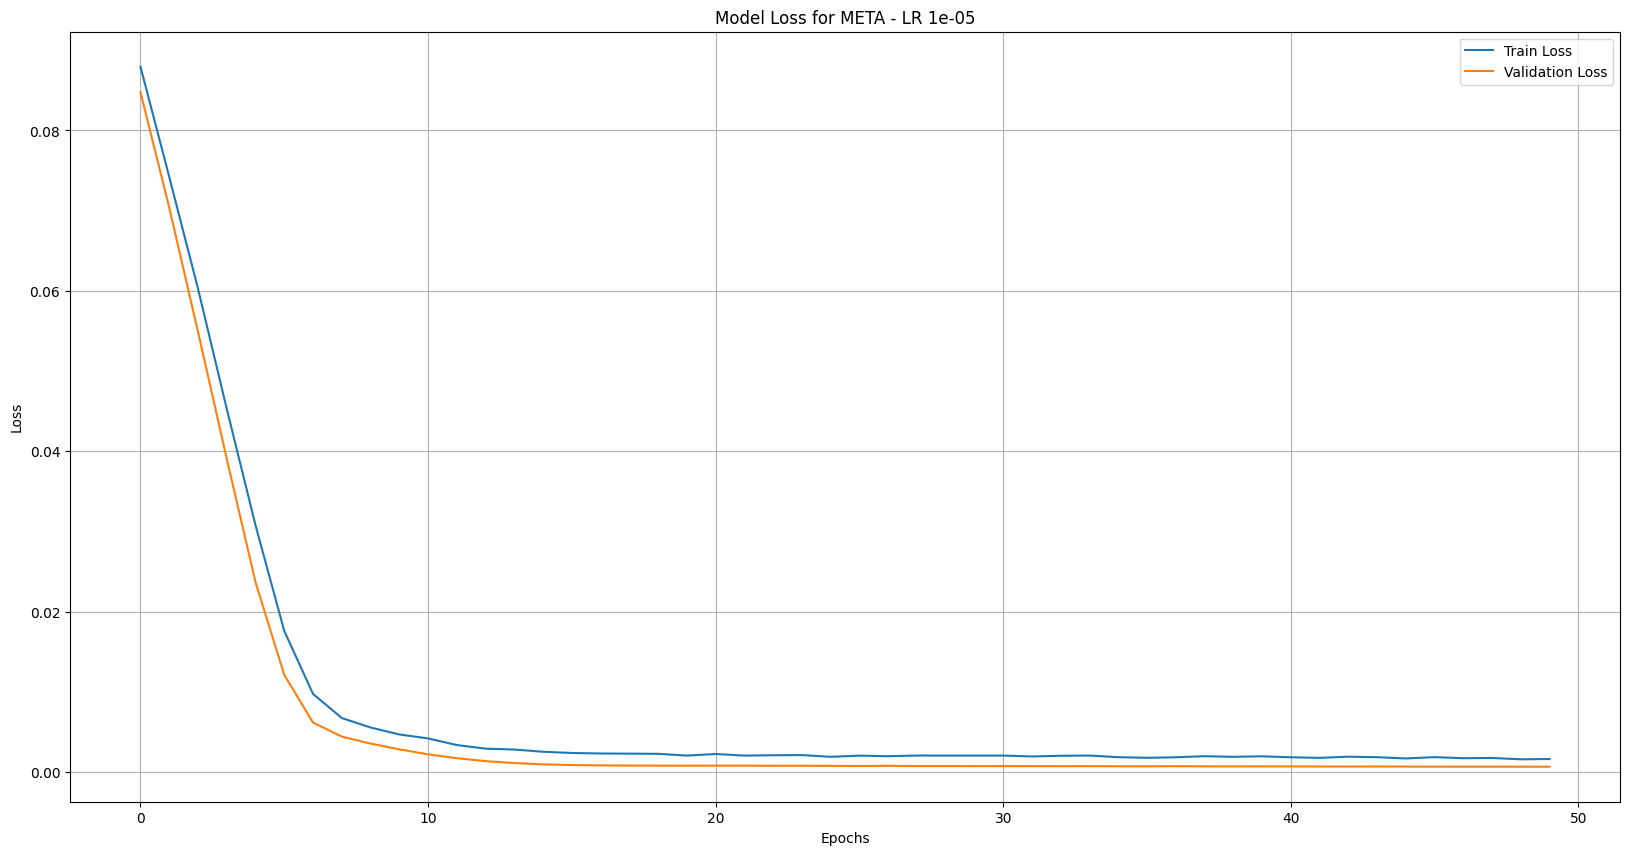

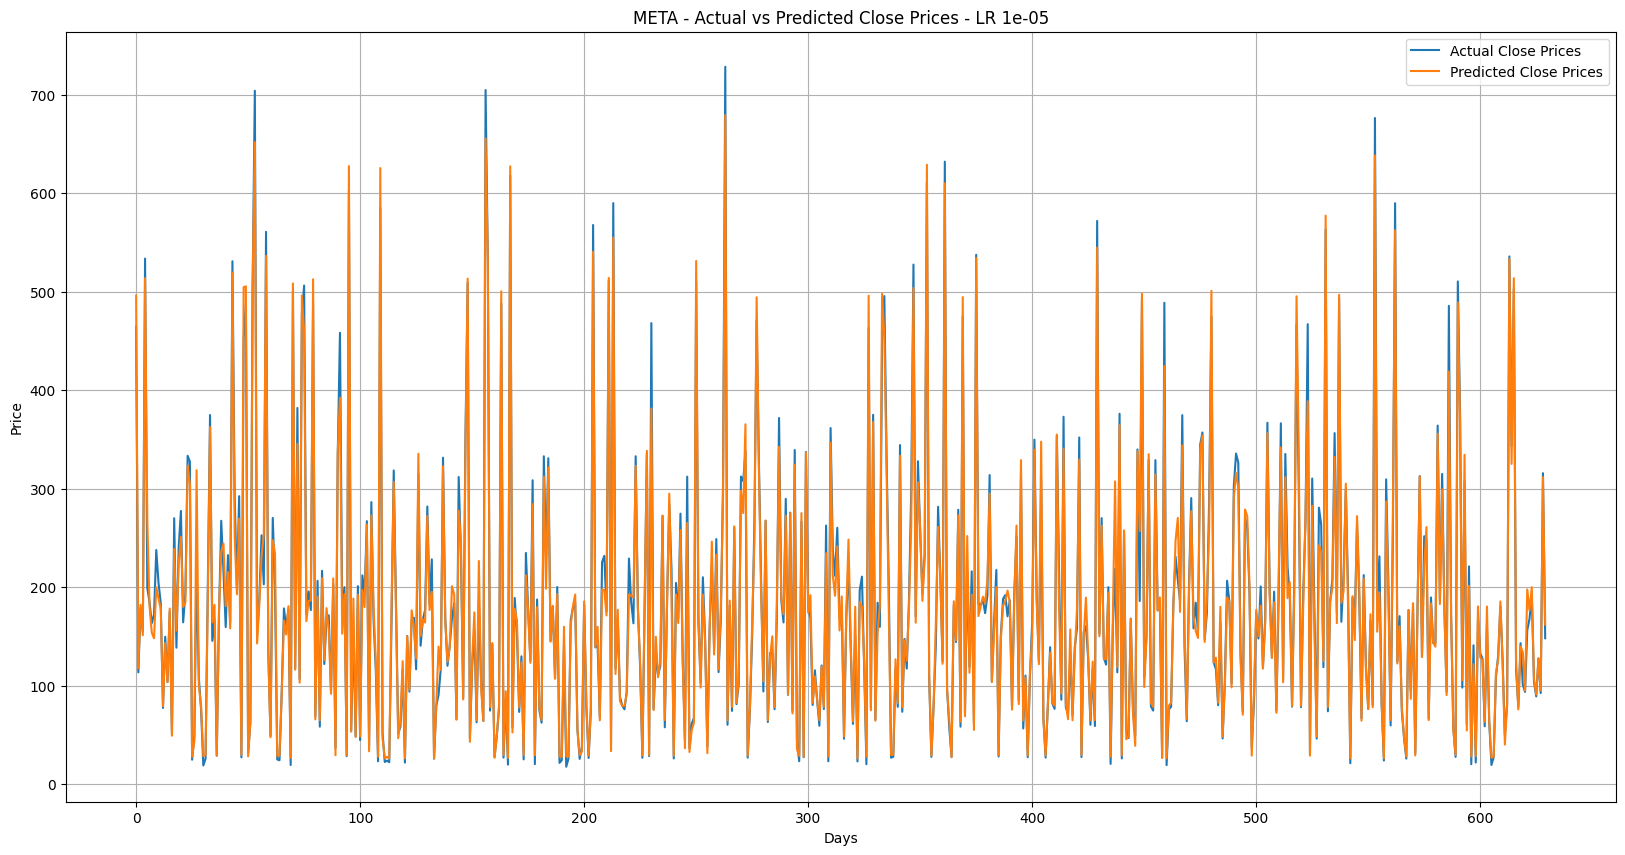

Training with learning rate: 0.0001


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 168ms/step - loss: 0.0711 - val_loss: 0.0095
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0085 - val_loss: 0.0014
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0024 - val_loss: 8.1241e-04
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0018 - val_loss: 7.2685e-04
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0017 - val_loss: 7.1797e-04
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0019 - val_loss: 6.2885e-04
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0014 - val_loss: 6.1198e-04
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0015 - val_loss: 5.6108e-04
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0016 - val_loss: 5.8181e-04
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0016 - val_loss: 5.3111e-04
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0016 - val_loss: 5.1100e-04
Epoch 12/50
32/32 ━━━━━━━

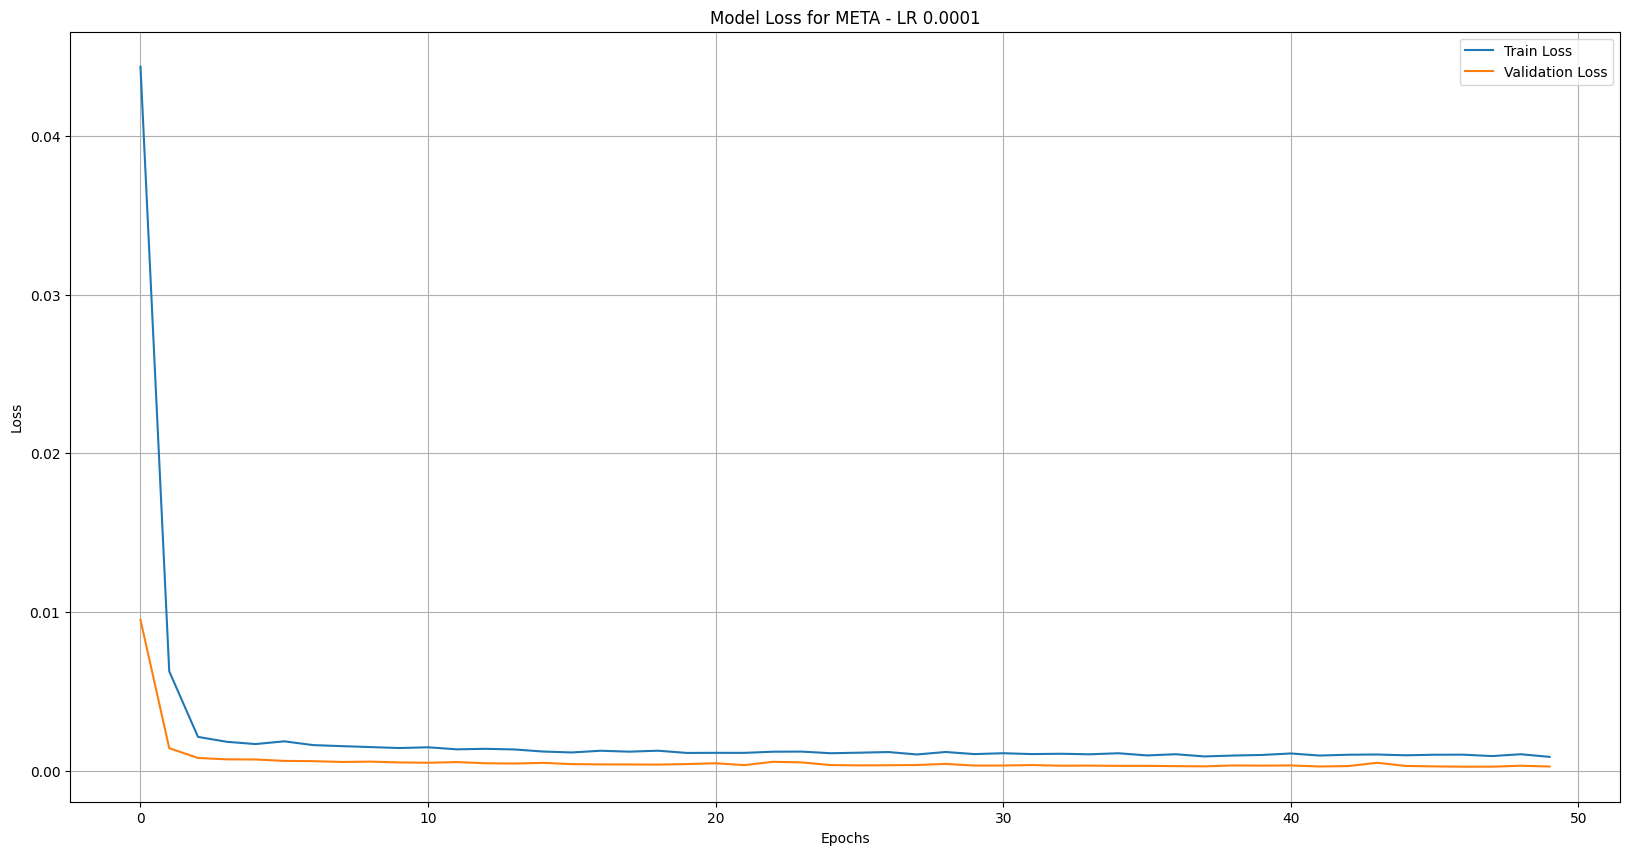

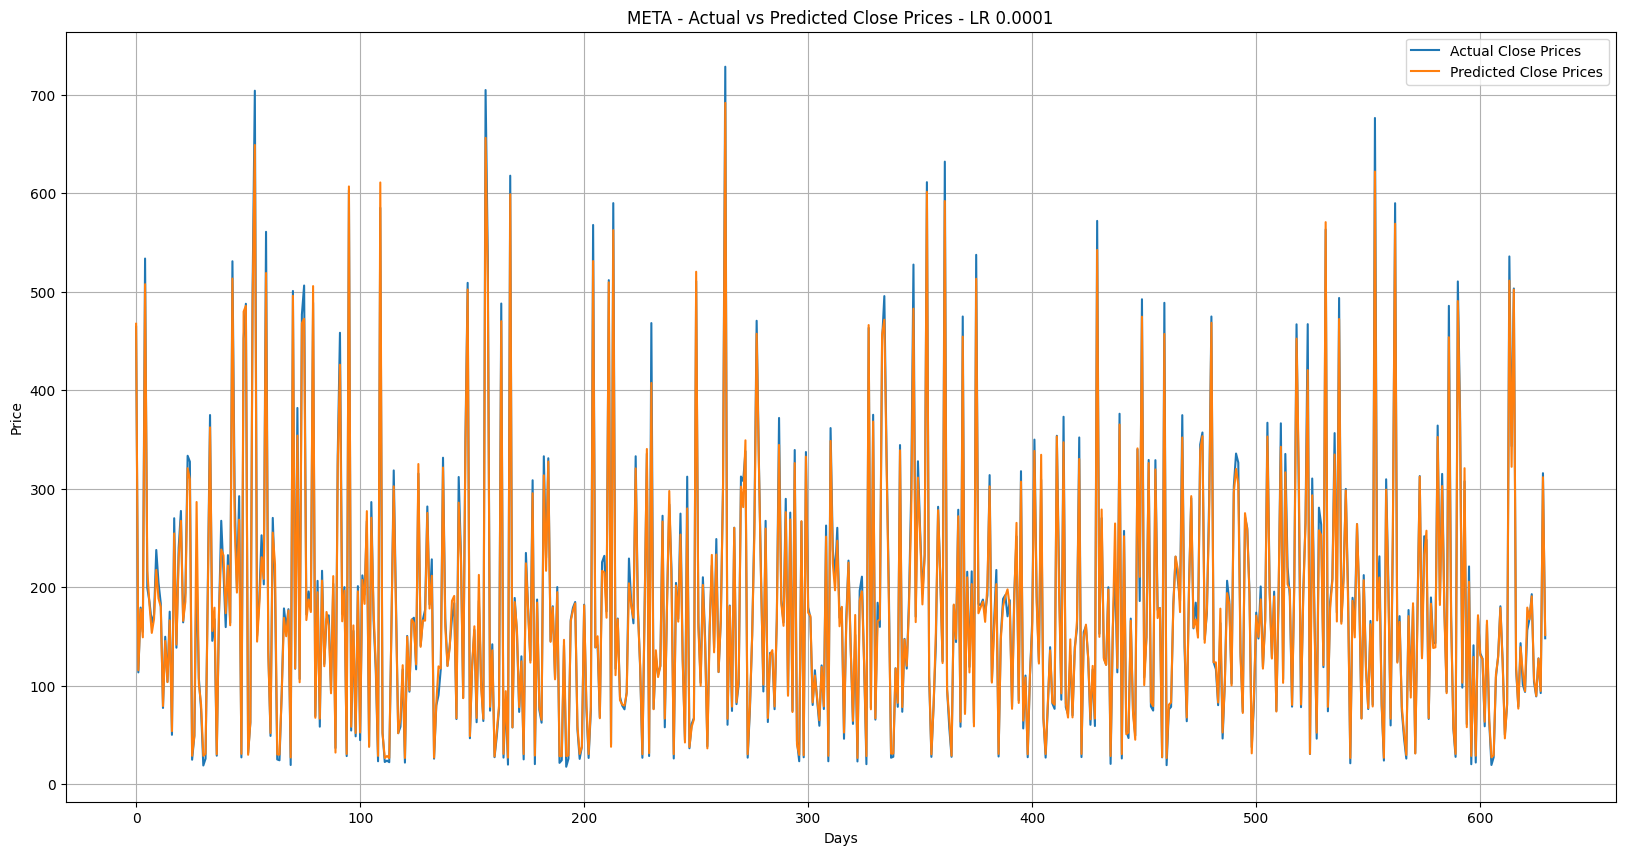

Training with learning rate: 0.001
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 164ms/step - loss: 0.0330 - val_loss: 0.0011
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0018 - val_loss: 5.6344e-04
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0013 - val_loss: 5.3456e-04
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0015 - val_loss: 5.0907e-04
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0015 - val_loss: 7.3818e-04
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0014 - val_loss: 5.3317e-04
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0013 - val_loss: 3.1274e-04
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0010 - val_loss: 5.1057e-04
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0011 - val_loss: 3.4054e-04
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0010 - val_loss: 4.3503e-04
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0014 - val_loss: 2.7339e-04
Epoch 12/50
32/32 ━━━━━━━━━━━━━━

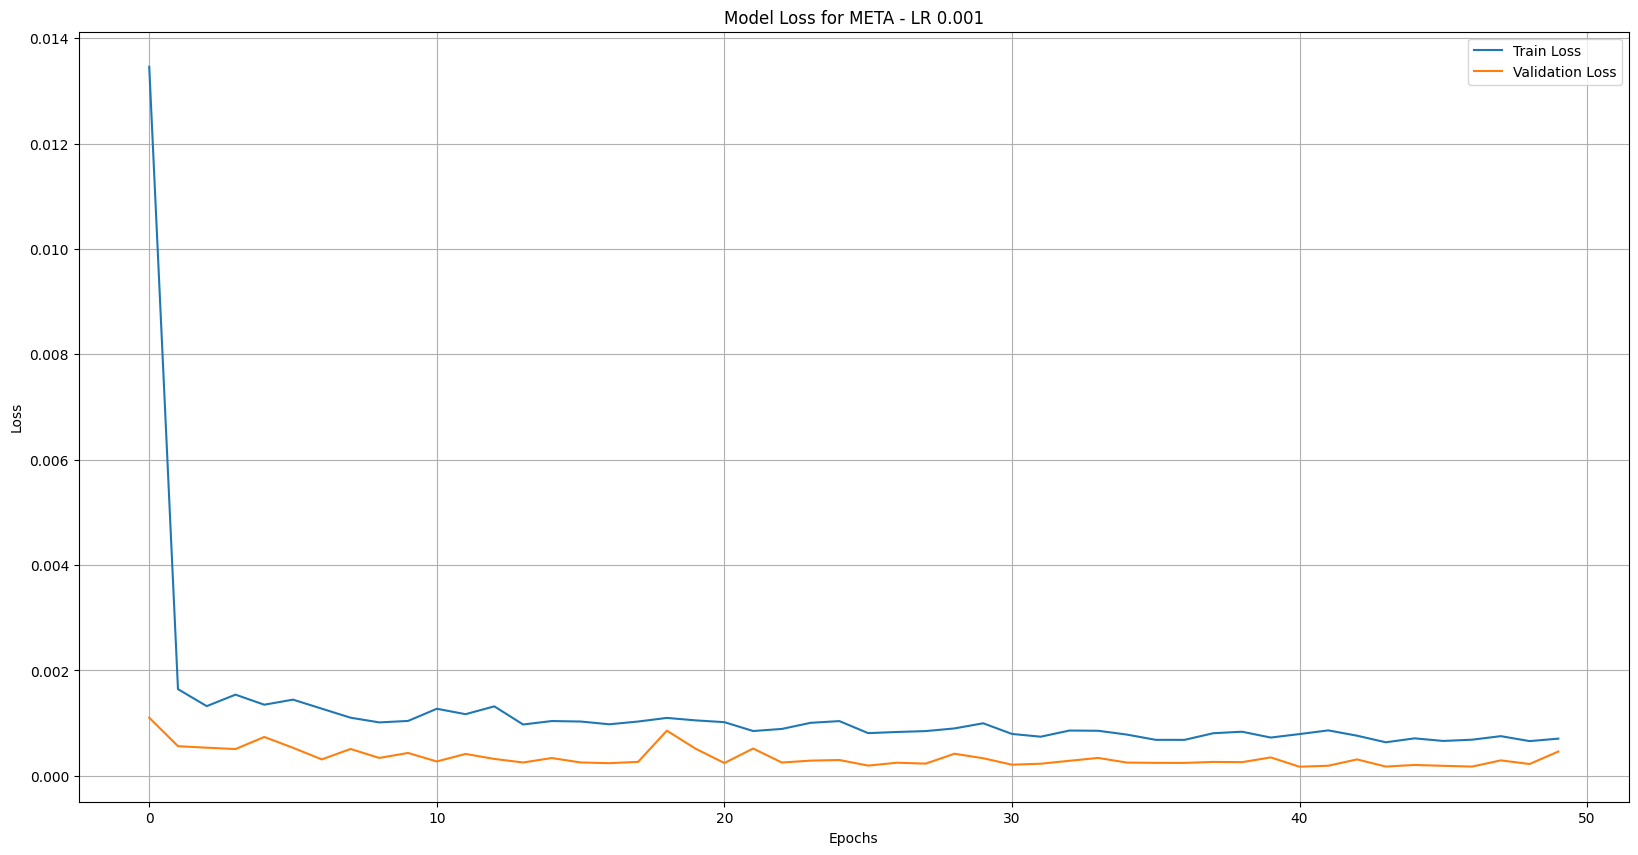

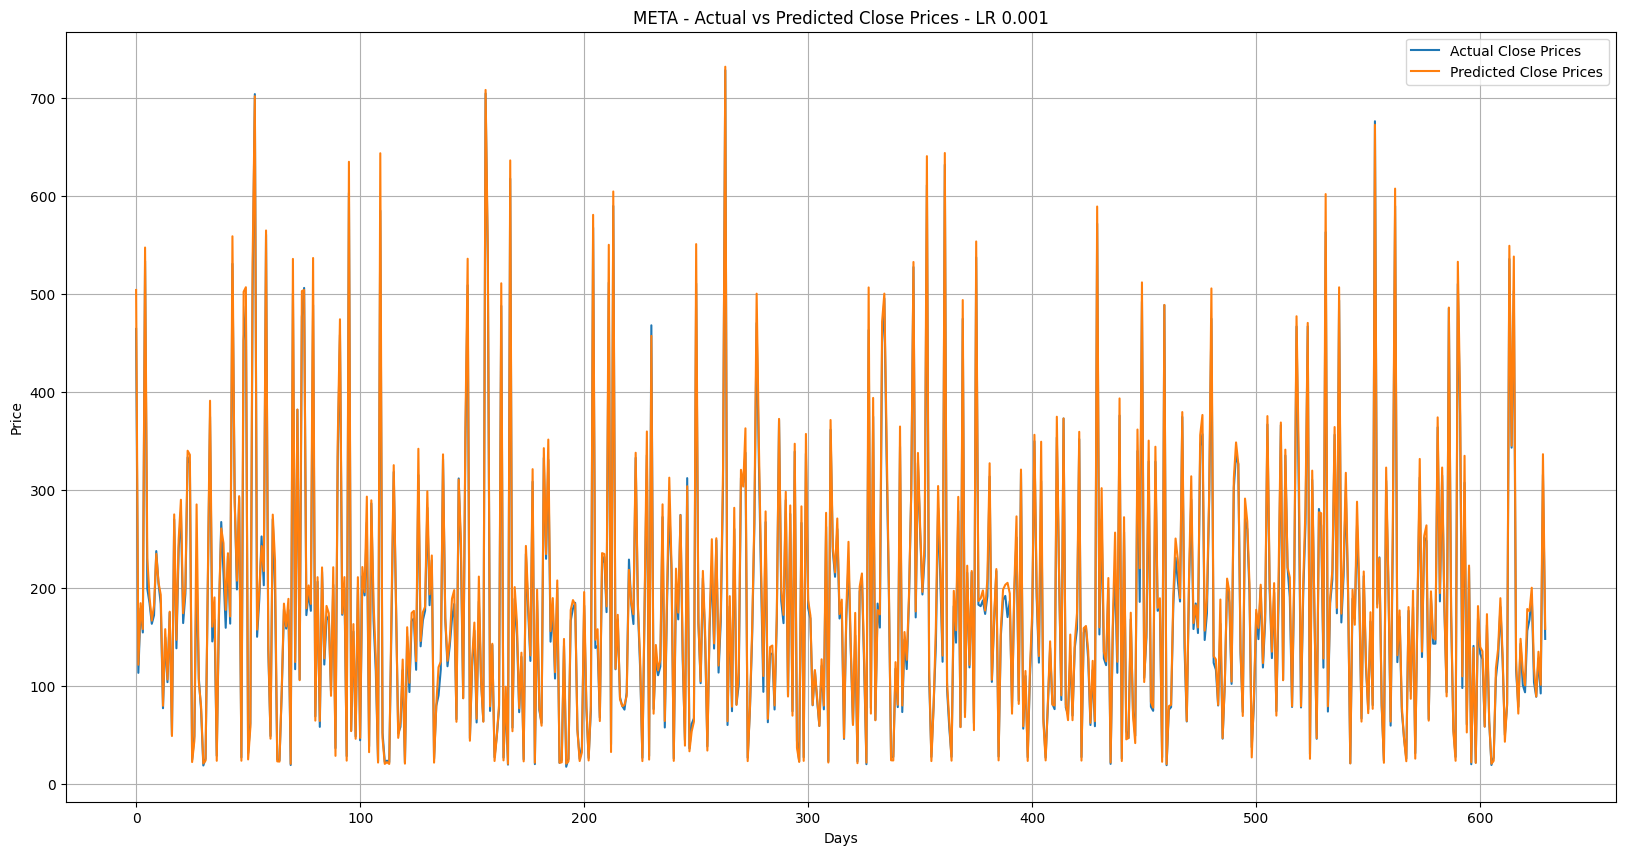

Training with learning rate: 0.01


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 168ms/step - loss: 0.0872 - val_loss: 0.0025
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0032 - val_loss: 0.0016
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0020 - val_loss: 7.7519e-04
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0018 - val_loss: 5.9610e-04
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0018 - val_loss: 3.1568e-04
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0012 - val_loss: 4.4688e-04
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0014 - val_loss: 3.3255e-04
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0016 - val_loss: 6.7976e-04
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━

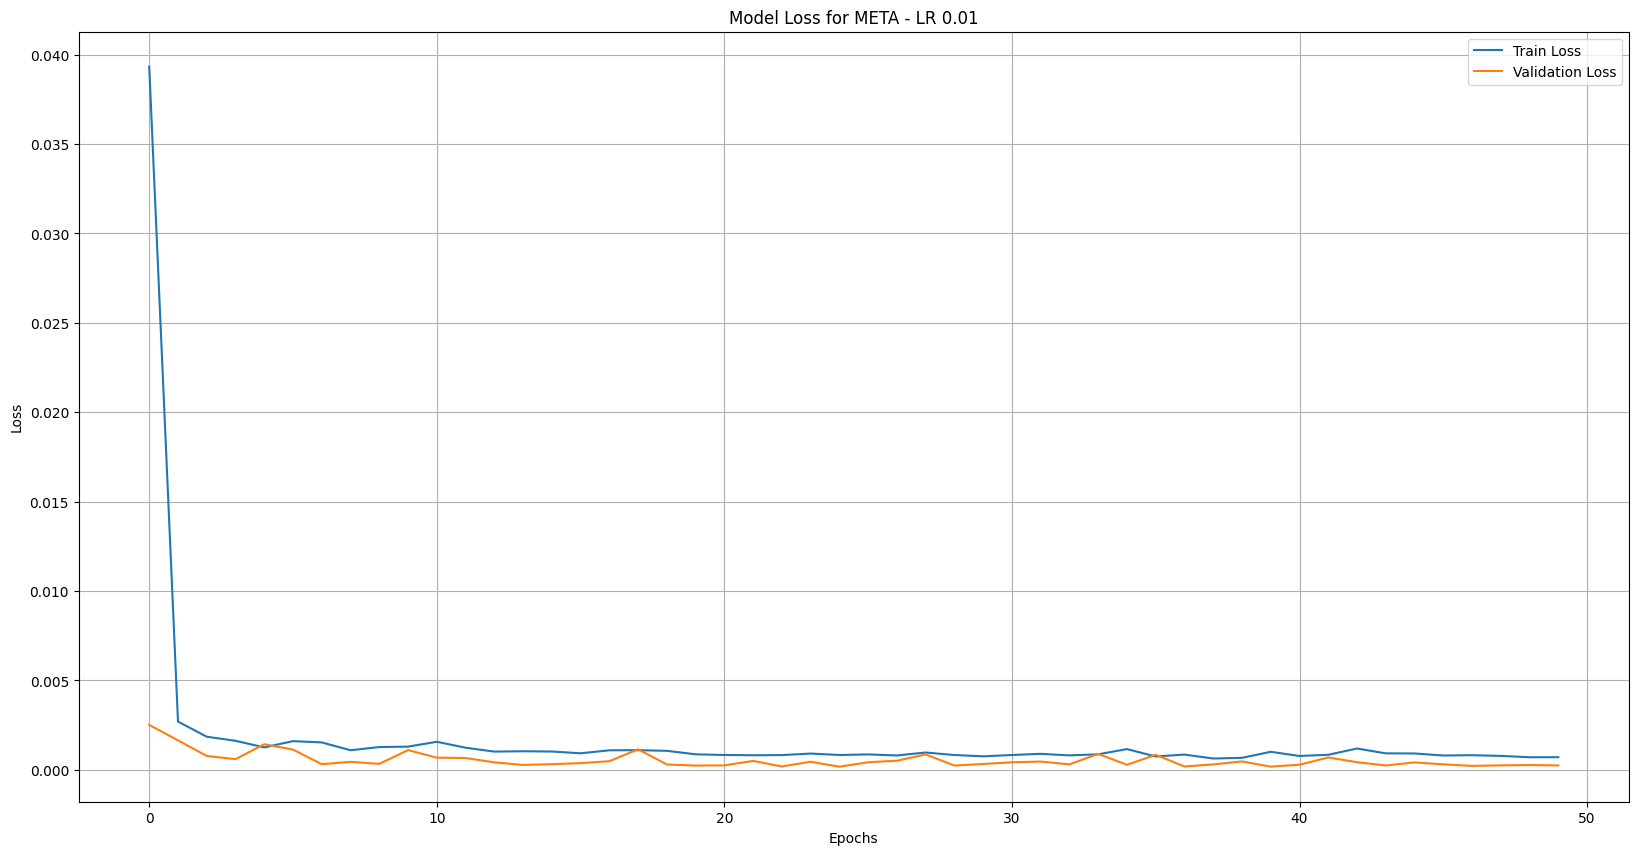

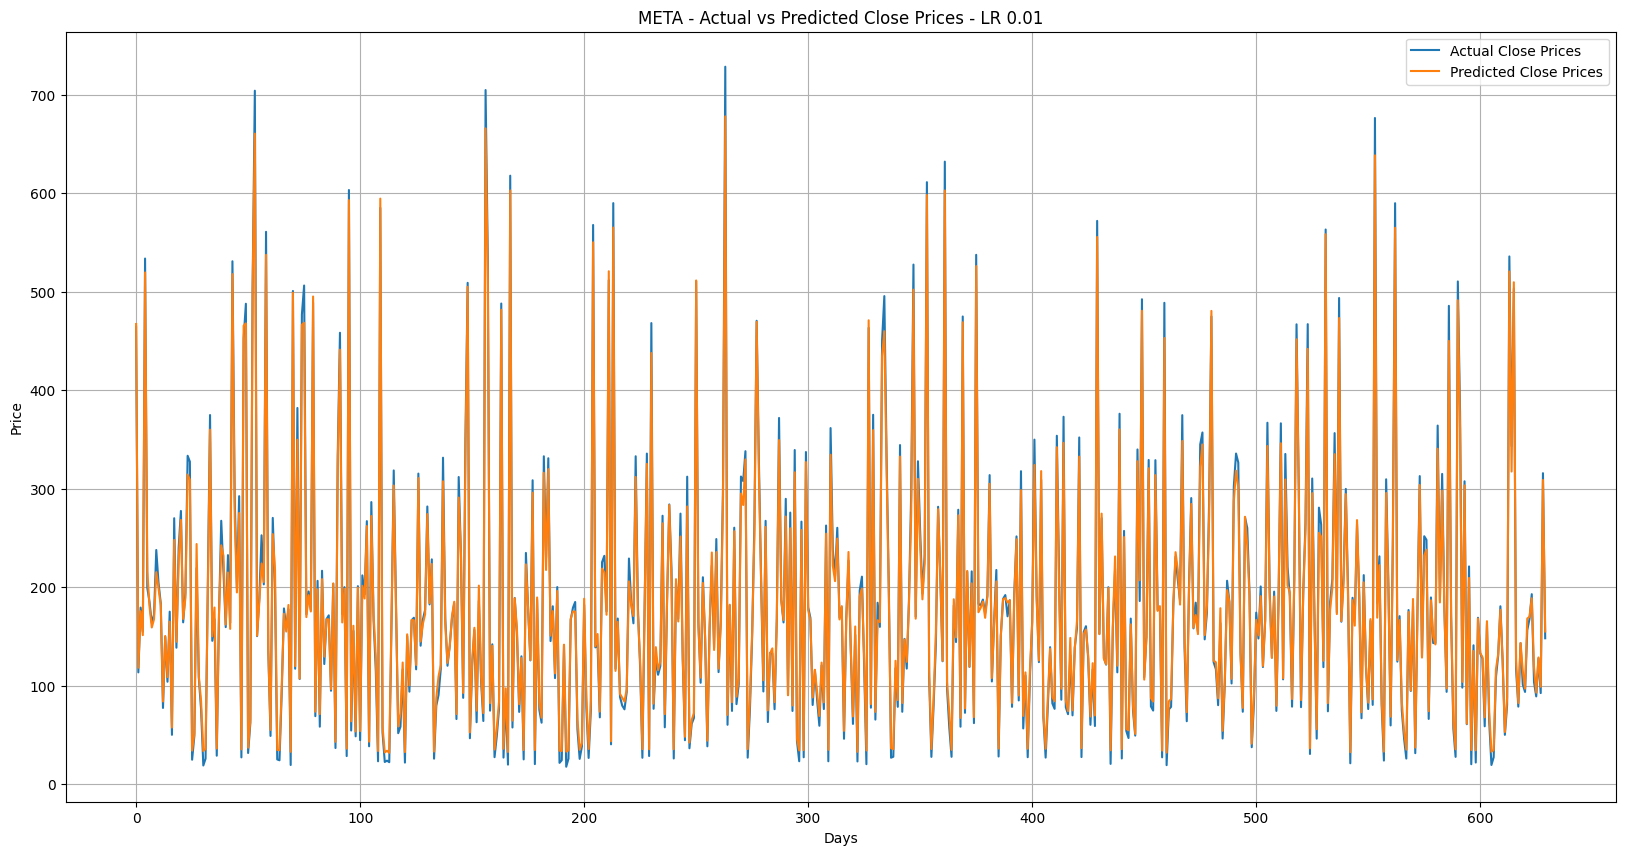

0.00001     0.00010     0.00100     0.01000
0  496.133484  467.515717  504.254395  467.276947
1  117.800064  115.679413  121.752701  118.211037
2  182.096634  177.642303  184.592194  175.665909
3  151.187302  149.068558  158.155319  151.271439
4  513.695190  507.706146  547.592468  519.625061

In [11]:
def fit_cnn_bi_lstm_individual(df, look_back=60, epochs=50, batch_size=64, learning_rates=[0.00001, 0.0001, 0.001, 0.01]):
    """
    Fits an CNN+BI-LSTM model to the close prices for Netflix using different learning rates.

    Parameters:
    - df: DataFrame containing close prices.
    - look_back: Number of past time steps to use as input features.
    - epochs: Number of epochs for training.
    - batch_size: Batch size for training.
    - learning_rates: List of learning rates to iterate over.

    Returns:
    - A dictionary with learning rates as keys and their trained models and predictions as values.
    - A DataFrame containing the predictions for META.
    """
    results = {}
    predictions_dict = {}
    scaler = MinMaxScaler(feature_range=(0, 1))

    print("Processing ticker: META")
    ticker_data = df["Close"].values.reshape(-1, 1)
    ticker_scaled = scaler.fit_transform(ticker_data)

    # Create dataset for time series modeling
    def create_dataset(data, look_back):
        X, Y = [], []
        for i in range(look_back, len(data)):
            X.append(data[i - look_back:i, 0])
            Y.append(data[i, 0])
        return np.array(X), np.array(Y)

    X, y = create_dataset(ticker_scaled, look_back)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Reshape input for CNN+Bi-LSTM
    X_train = X_train.reshape(X_train.shape[0], look_back, 1, 1, 1)
    X_test = X_test.reshape(X_test.shape[0], look_back, 1, 1, 1)

    for lr in learning_rates:
        print(f"Training with learning rate: {lr}")

        # CNN+Bi-LSTM model
        cl = Sequential()
        cl.add(TimeDistributed(Conv2D(filters=64, kernel_size=(1, 1), activation='relu'),
                               input_shape=(look_back, 1, 1, 1)))
        cl.add(TimeDistributed(MaxPooling2D(pool_size=(1, 1))))
        cl.add(TimeDistributed(Conv2D(filters=128, kernel_size=(1, 1), activation='relu')))
        cl.add(TimeDistributed(MaxPooling2D(pool_size=(1, 1))))
        cl.add(TimeDistributed(Conv2D(filters=64, kernel_size=(1, 1), activation='relu')))
        cl.add(TimeDistributed(MaxPooling2D(pool_size=(1, 1))))
        cl.add(TimeDistributed(Flatten()))
        cl.add(Bidirectional(LSTM(100, return_sequences=True)))
        cl.add(Dropout(0.5))
        cl.add(Bidirectional(LSTM(100, return_sequences=False)))
        cl.add(Dropout(0.5))
        cl.add(Dense(1))

        # Compile the model
        optimizer = Adam(learning_rate=lr)
        cl.compile(optimizer=optimizer, loss='mean_squared_error')

        # Train the model
        history = cl.fit(
            X_train, y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_split=0.2,
            verbose=1
        )

        # Predictions
        y_pred = cl.predict(X_test)
        y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
        y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

        # Save predictions
        predictions_dict[lr] = y_pred_inv.flatten()

        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
        mae = mean_absolute_error(y_test_inv, y_pred_inv)
        r_squared = r2_score(y_test_inv, y_pred_inv)
        final_loss = history.history['loss'][-1]

        print(f"META - Learning Rate: {lr} - RMSE: {rmse}, MAE: {mae}, R-squared: {r_squared}, Loss: {final_loss}")

        # Save results
        results[lr] = {
            'model': cl,
            'predictions': y_pred_inv,
            'actuals': y_test_inv,
            'metrics': {
                'RMSE': rmse,
                'MAE': mae,
                'R-squared': r_squared,
                'Loss': final_loss
            },
            'history': history.history
        }

        # Plot training & validation loss
        plt.figure(figsize=(20, 10))
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Model Loss for META - LR {lr}')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Plot the results
        plt.figure(figsize=(20, 10))
        plt.plot(y_test_inv, label='Actual Close Prices')
        plt.plot(y_pred_inv, label='Predicted Close Prices')
        plt.title(f'META - Actual vs Predicted Close Prices - LR {lr}')
        plt.xlabel('Days')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.show()

    # Convert predictions dictionary to DataFrame
    prediction = pd.DataFrame(predictions_dict)
    return results, prediction


results, prediction = fit_cnn_bi_lstm_individual(df)
prediction.head()

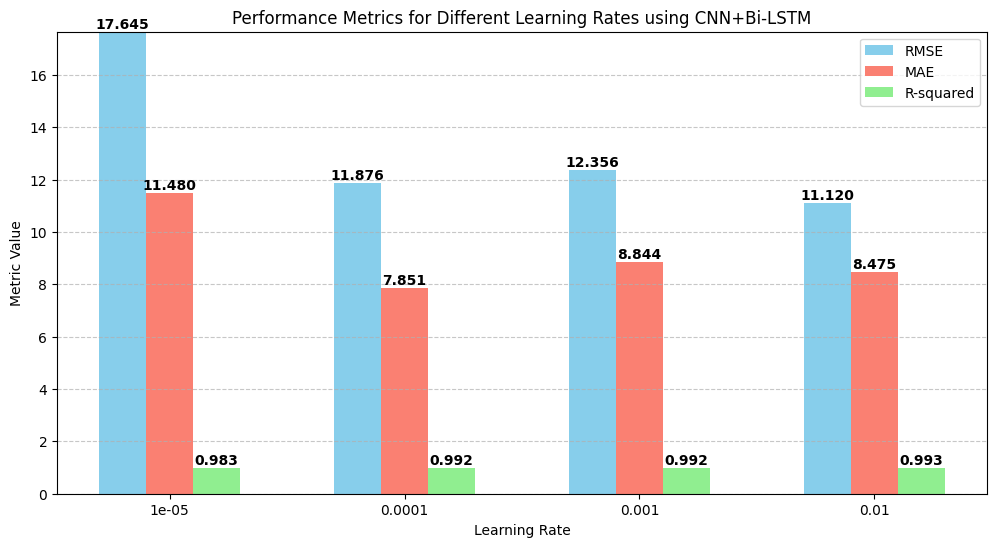

In [12]:
# Extract metrics from the results dictionary
learning_rates_list = list(results.keys())
rmses = [results[lr]['metrics']['RMSE'] for lr in learning_rates_list]
maes = [results[lr]['metrics']['MAE'] for lr in learning_rates_list]
r2s = [results[lr]['metrics']['R-squared'] for lr in learning_rates_list]
# Set width for grouped bars
bar_width = 0.2
x = np.arange(len(learning_rates_list))
plt.figure(figsize=(12, 6))
# Plot bars for RMSE, MAE, and R-squared
plt.bar(x - bar_width, rmses, width=bar_width, color='skyblue', label='RMSE')
plt.bar(x, maes, width=bar_width, color='salmon', label='MAE')
plt.bar(x + bar_width, r2s, width=bar_width, color='lightgreen', label='R-squared')

# Add labels
plt.xlabel('Learning Rate')
plt.ylabel('Metric Value')
plt.title('Performance Metrics for Different Learning Rates using CNN+Bi-LSTM')
plt.xticks(x, learning_rates_list)  # Set x-axis labels to learning rates
plt.ylim(0, max(max(rmses), max(maes), 1.05))  # Adjust y-axis range
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add value labels
def add_value_labels(ax, values, x_positions, offset):
    for i, val in enumerate(values):
        ax.text(x_positions[i], val + offset, f'{val:.3f}', ha='center', va='bottom', fontweight='bold')
ax = plt.gca()
add_value_labels(ax, rmses, x - bar_width, 0.02)
add_value_labels(ax, maes, x, 0.02)
add_value_labels(ax, r2s, x + bar_width, 0.02)
plt.show()